**MSc Computational Physics AUTh**<br>
**Academic Year: 2024-2025**<br>
**Master's Thesis**<br>

**Thesis Title:**<br>  
# **"Reconstruction of the EoSs of Exotic Stars using ML and ANNs regression models"**

**Implemented by: Ioannis Stergakis**<br>
**AEM: 4439**<br>

**Jupyter Notebook: JN4b**<br>
**Name: "testing_rf_regress.ipynb"**<br>

**Description:**<br> 
**Training and testing the `RandomForestRegressor` algorithm:**<br>
**1. Performing grid search to determine the best hyperparameters**<br>
**2. Performing cross validation to optimize the model for future foreign data**<br>
**3. Assessing the accuracy of the best model using different scorers and metrics**


**Abbrevations:**<br>
**1. NS -> Neutron Star**<br>
**2. QS -> Quark Star**<br>
**3. ML -> Machine Learning**

In [1]:
# Importing useful modules
import joblib
from data_analysis_ES_ML import *

In [ ]:
# Defining the grid of hyperparameters value for the 'RandomForest' regressor
rf_grid = {
    'n_estimators': [25, 50],
    'max_depth': [None, 10, 20],
    'min_samples_split': [20,40],
    'min_samples_leaf': [10, 12, 14],
    'max_features': [None, 'sqrt', 'log2'],
}

# 1. Neutron Stars

## **1.1 Using 8 M-R points**

### A. Predicting Slope $\frac{dP}{dE}=c^2_s$ Values

#### ->Using non-shuffled data

In [6]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 2.0'35.28"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.0021530106027379398



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.18369609, 0.34490215, 0.53752404, ..., 1.        , 1.        ,
        1.        ],
       [0.05825474, 0.18040121, 0.28408614, ..., 0.7228481 , 0.98730037,
        0.99931103],
       [0.07076593, 0.13018325, 0.19004912, ..., 0.584856  , 0.86000039,
        0.9830444 ],
       ...,
       [0.18506908, 0.3468085 , 0.54064771, ..., 1.        , 1.        ,
        1.        ],
       [0.03927371, 0.10701147, 0.18174562, ..., 0.45204022, 0.68114727,
        0.94676382],
       [0.14427889, 0.17701026, 0.29014269, ..., 0.6043285 , 0.84061071,
        0.92955981]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
29853,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
17829,0.029799,0.190997,0.307855,0.402585,0.483893,0.733178,1.000000,1.000000
4645,0.076958,0.089186,0.121635,0.308391,0.373410,0.578874,0.860359,1.000000
17992,0.067829,0.047434,0.174548,0.222690,0.263566,0.388325,0.553320,0.755556
14395,0.053047,0.081367,0.243274,0.320498,0.387702,0.599235,0.886995,1.000000
...,...,...,...,...,...,...,...,...
28192,0.185069,0.256501,0.378645,0.468629,0.540909,0.740931,0.965952,0.275235
6012,0.109186,0.209544,0.245212,0.309539,0.363100,0.707140,1.000000,1.000000
30339,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
6558,0.025633,0.112650,0.184724,0.245014,0.298151,0.469608,0.713622,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00029131 0.00070522 0.00120009 0.00125184 0.0009796  0.00147165
 0.00253693 0.00286564]
Uniform average
0.0014127857059071038
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00035156 0.00096531 0.00193016 0.0022499  0.00193534 0.00384976
 0.00727746 0.00783394]
Uniform average
0.0032991802487125433



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
------------------------------------------------------------------------------------------

array([[0.17481158, 0.1759197 , 0.25430002, ..., 0.92981112, 0.99249212,
        0.98854565],
       [0.05784794, 0.09587604, 0.15512543, ..., 0.35096955, 0.50726356,
        0.70339127],
       [0.07566445, 0.13265985, 0.13517608, ..., 0.38464613, 0.54411376,
        0.73119612],
       ...,
       [0.09094725, 0.15642977, 0.21378378, ..., 0.6240733 , 0.90586319,
        0.99038985],
       [0.11293274, 0.18989666, 0.23537363, ..., 0.68555491, 0.94206466,
        0.99102717],
       [0.13318402, 0.23534929, 0.36897254, ..., 0.59803308, 0.83460647,
        0.98454136]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
27403,0.185069,0.166293,0.220019,0.547424,0.650657,0.953304,1.000000,1.000000
1297,0.065343,0.070036,0.152885,0.195693,0.232261,0.345147,0.497459,0.689001
7285,0.058007,0.088727,0.121030,0.225510,0.266825,0.392778,0.559009,0.762228
10961,0.139575,0.112790,0.331963,0.432918,0.519128,0.780931,0.505879,0.591481
16286,0.128174,0.244510,0.178352,0.210017,0.354887,0.510172,0.704315,0.926398
...,...,...,...,...,...,...,...,...
22529,0.125170,0.130835,0.175517,0.206806,0.349629,0.503318,0.696071,0.917394
18187,0.067829,0.103180,0.139938,0.260155,0.306720,0.446652,0.626792,0.840283
4904,0.076958,0.137308,0.209514,0.265896,0.418848,0.643191,0.943761,1.000000
19303,0.106226,0.187294,0.177150,0.208656,0.471926,0.716803,1.000000,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00035609 0.0008898  0.0016319  0.00166283 0.00138495 0.00236598
 0.00418883 0.004664  ]
Uniform average
0.00214304714479313
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00042978 0.0012259  0.00263419 0.00298536 0.00277834 0.00620422
 0.01196337 0.01294592]
Uniform average
0.00514588649055309



>Learning curve


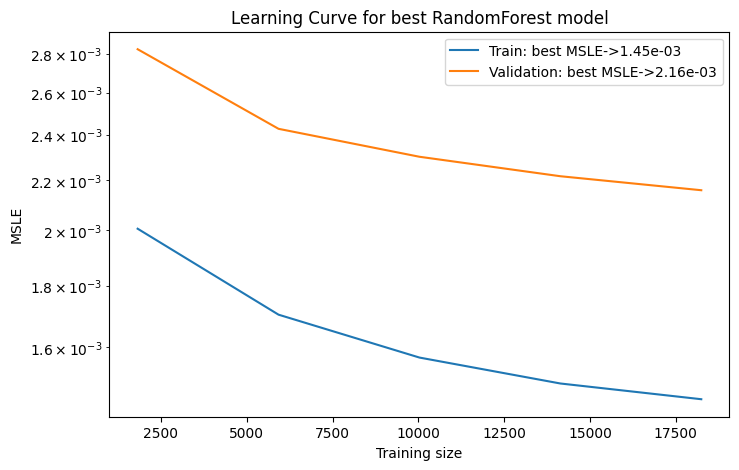




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_dpde_16X.pkl" file !!!


In [17]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100.csv",mag_reg="dPdE",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_dpde_16X")

#### ->Using rowwise-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 2.0'50.13"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.00345949798781668



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.18380386, 0.34212602, 0.53252069, ..., 0.99051158, 0.99623519,
        0.99395378],
       [0.09877327, 0.18184568, 0.28013989, ..., 0.68443477, 0.90811217,
        0.96432792],
       [0.07301261, 0.12256797, 0.19304561, ..., 0.5699419 , 0.83668507,
        0.97569248],
       ...,
       [0.18435336, 0.34447001, 0.53660707, ..., 0.99247838, 0.99716707,
        0.99638486],
       [0.05057092, 0.10565261, 0.18445081, ..., 0.44059291, 0.65443037,
        0.88842373],
       [0.1396888 , 0.18705091, 0.28714666, ..., 0.58073504, 0.79732397,
        0.89539084]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
29853,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
17829,0.029799,0.190997,0.307855,0.402585,0.483893,0.733178,1.000000,1.000000
4645,0.076958,0.089186,0.121635,0.308391,0.373410,0.578874,0.860359,1.000000
17992,0.067829,0.047434,0.174548,0.222690,0.263566,0.388325,0.553320,0.755556
14395,0.053047,0.081367,0.243274,0.320498,0.387702,0.599235,0.886995,1.000000
...,...,...,...,...,...,...,...,...
28192,0.185069,0.256501,0.378645,0.468629,0.540909,0.740931,0.965952,0.275235
6012,0.109186,0.209544,0.245212,0.309539,0.363100,0.707140,1.000000,1.000000
30339,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
6558,0.025633,0.112650,0.184724,0.245014,0.298151,0.469608,0.713622,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00045605 0.00119535 0.00212095 0.00214562 0.00196215 0.00258842
 0.00390913 0.00445276]
Uniform average
0.0023538037249636826
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00055384 0.00163494 0.00340053 0.00387073 0.00381786 0.00670082
 0.01092931 0.01211922]
Uniform average
0.005378408547270352



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------

array([[0.15053992, 0.22285634, 0.36026934, ..., 0.76929942, 0.91437658,
        0.94037705],
       [0.0556557 , 0.10012077, 0.16551176, ..., 0.37917245, 0.55416814,
        0.76819639],
       [0.06996537, 0.11911707, 0.18076804, ..., 0.42107103, 0.59985825,
        0.78867316],
       ...,
       [0.082802  , 0.15131599, 0.22425044, ..., 0.60052928, 0.86102609,
        0.96245449],
       [0.11139679, 0.18756737, 0.27751355, ..., 0.61685172, 0.82825823,
        0.92007075],
       [0.1352585 , 0.1959583 , 0.31880615, ..., 0.68690299, 0.89416999,
        0.95403902]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
27403,0.185069,0.166293,0.220019,0.547424,0.650657,0.953304,1.000000,1.000000
1297,0.065343,0.070036,0.152885,0.195693,0.232261,0.345147,0.497459,0.689001
7285,0.058007,0.088727,0.121030,0.225510,0.266825,0.392778,0.559009,0.762228
10961,0.139575,0.112790,0.331963,0.432918,0.519128,0.780931,0.505879,0.591481
16286,0.128174,0.244510,0.178352,0.210017,0.354887,0.510172,0.704315,0.926398
...,...,...,...,...,...,...,...,...
22529,0.125170,0.130835,0.175517,0.206806,0.349629,0.503318,0.696071,0.917394
18187,0.067829,0.103180,0.139938,0.260155,0.306720,0.446652,0.626792,0.840283
4904,0.076958,0.137308,0.209514,0.265896,0.418848,0.643191,0.943761,1.000000
19303,0.106226,0.187294,0.177150,0.208656,0.471926,0.716803,1.000000,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00052454 0.0013996  0.00265371 0.0026462  0.00261244 0.00407425
 0.00659129 0.00703021]
Uniform average
0.0034415321765594122
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00063681 0.00192674 0.00426957 0.00477739 0.0052297  0.01061303
 0.0185767  0.01966913]
Uniform average
0.008212383596710537



>Learning curve


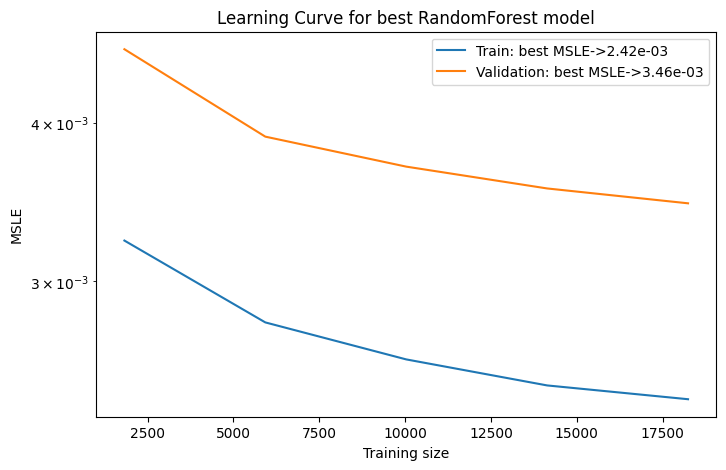




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_dpde_16X_rwsh.pkl" file !!!


In [18]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv",mag_reg="dPdE",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_dpde_16X_rwsh")

### B. Predicting Energy on center $E_c$ Values

#### ->Using non-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 2.0'27.33"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.004343411098613692



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 206.39295661,  263.81769526,  320.9254532 , ...,  501.09156243,
         701.09156243, 1101.09156243],
       [ 317.88522395,  452.06747994,  560.2149316 , ...,  864.10690697,
        1104.66054488, 1524.77632583],
       [ 387.92611103,  559.60682203,  744.52811936, ..., 1143.34750214,
        1432.84875434, 1865.81274743],
       ...,
       [ 206.13550997,  263.36367681,  320.05675961, ...,  499.44260503,
         699.44260503, 1099.44260503],
       [ 487.06912077,  813.10382972,  994.67193443, ..., 1493.60967119,
        1862.22635951, 2369.36376079],
       [ 235.46211914,  330.65011186,  447.36043418, ...,  908.99650576,
        1208.78919803, 1703.37960988]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
29853,206.135510,263.343570,319.926654,360.612345,393.972268,499.112505,699.112505,1099.112505
17829,325.586848,498.567816,599.657002,670.184863,726.629588,891.139505,1114.984799,1514.984799
4645,379.824920,535.624272,772.131771,897.790430,971.207686,1181.993520,1459.687963,1869.706162
17992,284.859202,502.044543,809.362556,935.370989,1038.234895,1345.097946,1768.725112,2376.469790
14395,367.022963,589.502870,772.116768,861.042969,931.719969,1135.034446,1403.843898,1810.080612
...,...,...,...,...,...,...,...,...
28192,206.135510,267.396054,346.148905,405.123725,454.622265,609.792109,842.297809,2106.606916
6012,356.348895,452.226902,561.715870,651.886301,726.219623,931.317658,1161.813081,1561.813081
30339,206.135510,263.343570,319.926654,360.612345,393.972268,499.111054,699.111054,1099.111054
6558,380.124889,862.707929,1032.695015,1149.420203,1241.601474,1503.547736,1842.082525,2299.533313


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00616908 0.00405165 0.00289934 0.00231981 0.00237804 0.00139602
 0.00148991 0.00503633]
Uniform average
0.0032175214806614517
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[  759.8694665   1022.20057705  1039.47887979  1132.19218249
  1364.35222832  1326.81060162  2469.7795383  22430.36348724]
Uniform average
3943.1308701639227



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------

array([[ 218.24831825,  293.44351033,  401.97380797, ...,  640.44060308,
         849.78977443, 1265.74748356],
       [ 511.61977934,  722.81002701,  931.37010884, ..., 1524.87572867,
        1987.17233568, 2641.23092619],
       [ 366.63594642,  545.17480655,  783.41245284, ..., 1336.16917389,
        1762.50015006, 2380.00633654],
       ...,
       [ 371.38967856,  536.60662746,  685.100481  , ..., 1048.55355609,
        1311.91647269, 1728.47129927],
       [ 281.13380201,  408.00873634,  523.96260159, ...,  872.34907242,
        1124.22019277, 1551.51060584],
       [ 258.93062553,  348.16295216,  442.42210358, ...,  838.46432655,
        1119.80749106, 1581.74669563]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
27403,206.135510,275.673511,404.505879,473.021363,514.763618,639.186987,839.659192,1239.659192
1297,449.116994,688.917394,931.128921,1074.758682,1191.650902,1538.390003,2012.257842,2683.301803
7285,334.783538,538.527863,776.238069,922.739846,1024.332523,1327.582056,1746.656473,2348.665047
10961,276.583390,418.302241,552.477559,617.972227,670.523459,824.417697,1181.406538,1905.075724
16286,302.075586,383.981829,510.689681,639.227324,745.339833,976.073292,1303.783182,1790.679665
...,...,...,...,...,...,...,...,...
22529,229.674954,357.159629,519.744652,650.317354,758.052414,992.090141,1323.963147,1816.104828
18187,284.859202,459.590557,664.603859,789.869233,878.089490,1143.327380,1514.510128,2056.178980
4904,379.824920,521.215682,665.941597,771.194974,854.999709,1043.798167,1295.345065,1696.737884
19303,272.415878,375.439185,514.493553,643.886097,747.590727,916.066641,1143.951321,1543.951321


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00719273 0.00499136 0.00371355 0.00302794 0.00306286 0.00184982
 0.00227218 0.00838441]
Uniform average
0.004311855731896739
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[  882.07241616  1246.32978005  1349.31296932  1513.39193593
  1811.24254223  1788.31364999  3802.35388797 36805.76828976]
Uniform average
6149.84818392664



>Learning curve


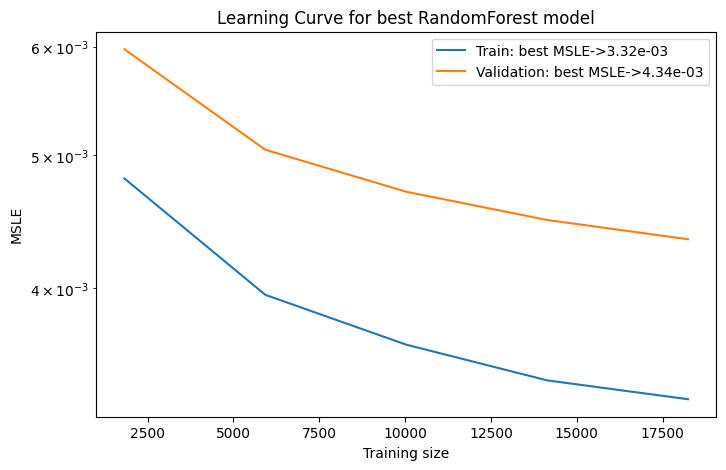




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_enrg_16X.pkl" file !!!


In [19]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100.csv",mag_reg="enrg",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_enrg_16X")

#### ->Using rowwise-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 2.0'42.06"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.00706363512440643



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 206.13550997,  263.350938  ,  319.97433115, ...,  499.23357095,
         699.23357095, 1099.23357095],
       [ 306.52593954,  437.82225676,  556.18479565, ...,  898.30681505,
        1156.44285233, 1596.99267605],
       [ 375.515908  ,  546.86619467,  730.93212887, ..., 1134.70795241,
        1426.04711411, 1862.94783761],
       ...,
       [ 206.48873634,  264.15037976,  322.30835723, ...,  505.31327934,
         705.9845495 , 1107.01026235],
       [ 497.45328831,  784.89015065,  981.91223079, ..., 1496.66703498,
        1881.37635279, 2414.67207713],
       [ 245.26101806,  344.98828425,  461.73284606, ...,  896.08722123,
        1226.24686708, 1777.89340181]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
29853,206.135510,263.343570,319.926654,360.612345,393.972268,499.112505,699.112505,1099.112505
17829,325.586848,498.567816,599.657002,670.184863,726.629588,891.139505,1114.984799,1514.984799
4645,379.824920,535.624272,772.131771,897.790430,971.207686,1181.993520,1459.687963,1869.706162
17992,284.859202,502.044543,809.362556,935.370989,1038.234895,1345.097946,1768.725112,2376.469790
14395,367.022963,589.502870,772.116768,861.042969,931.719969,1135.034446,1403.843898,1810.080612
...,...,...,...,...,...,...,...,...
28192,206.135510,267.396054,346.148905,405.123725,454.622265,609.792109,842.297809,2106.606916
6012,356.348895,452.226902,561.715870,651.886301,726.219623,931.317658,1161.813081,1561.813081
30339,206.135510,263.343570,319.926654,360.612345,393.972268,499.111054,699.111054,1099.111054
6558,380.124889,862.707929,1032.695015,1149.420203,1241.601474,1503.547736,1842.082525,2299.533313


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00840608 0.00597231 0.0048678  0.00407194 0.00405519 0.00258685
 0.00293783 0.00770934]
Uniform average
0.005075916507802964
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1012.8338795   1433.96724729  1696.00658614  1901.86004791
  2234.95693652  2332.08724873  4717.74748803 33178.86339515]
Uniform average
6063.540353659686



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
---------------------------------------------------------------

array([[ 227.9699164 ,  306.69706271,  404.9709852 , ...,  670.59886112,
         907.40978072, 1349.55768049],
       [ 494.18788213,  735.02308574,  939.61387059, ..., 1476.82127268,
        1887.23198553, 2463.87444207],
       [ 382.9253971 ,  563.16299856,  768.78697496, ..., 1281.3098024 ,
        1684.86688662, 2276.94518143],
       ...,
       [ 365.15194198,  526.00072296,  691.37813143, ..., 1092.10761596,
        1388.59510513, 1844.61511795],
       [ 278.3997671 ,  392.81906454,  506.79781814, ...,  900.59050741,
        1194.91531743, 1688.25573743],
       [ 260.04745272,  364.68351601,  471.90233099, ...,  839.11676316,
        1122.10024137, 1606.72186732]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
27403,206.135510,275.673511,404.505879,473.021363,514.763618,639.186987,839.659192,1239.659192
1297,449.116994,688.917394,931.128921,1074.758682,1191.650902,1538.390003,2012.257842,2683.301803
7285,334.783538,538.527863,776.238069,922.739846,1024.332523,1327.582056,1746.656473,2348.665047
10961,276.583390,418.302241,552.477559,617.972227,670.523459,824.417697,1181.406538,1905.075724
16286,302.075586,383.981829,510.689681,639.227324,745.339833,976.073292,1303.783182,1790.679665
...,...,...,...,...,...,...,...,...
22529,229.674954,357.159629,519.744652,650.317354,758.052414,992.090141,1323.963147,1816.104828
18187,284.859202,459.590557,664.603859,789.869233,878.089490,1143.327380,1514.510128,2056.178980
4904,379.824920,521.215682,665.941597,771.194974,854.999709,1043.798167,1295.345065,1696.737884
19303,272.415878,375.439185,514.493553,643.886097,747.590727,916.066641,1143.951321,1543.951321


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00945196 0.00714606 0.00628511 0.00537337 0.00528327 0.00361988
 0.0050569  0.01408819]
Uniform average
0.007038093256759845
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1135.67729564  1723.55684111  2254.85975183  2618.22354587
  3053.02712927  3318.27483995  8073.58902298 58121.43218879]
Uniform average
10037.330076929486



>Learning curve


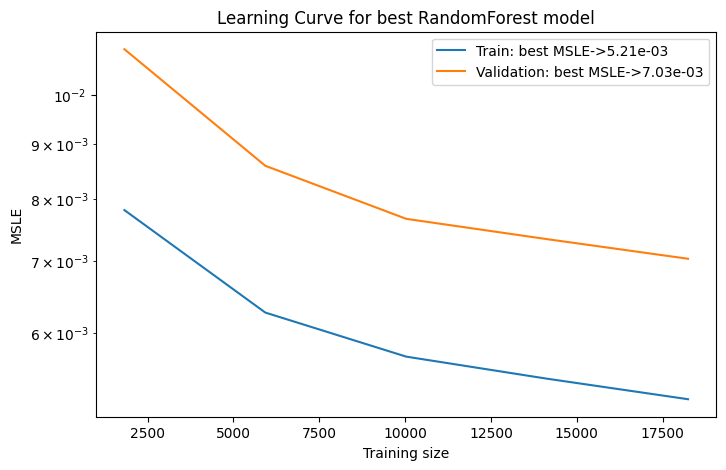




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_enrg_16X_rwsh.pkl" file !!!


In [20]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv",mag_reg="enrg",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_enrg_16X_rwsh")

### C. Predicting polytropic parameter $\Gamma$ Values

#### ->Using non-shuffled data

In [31]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100.csv","Gamma",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "Gamma"
Number of Y columns:  4
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 2.0'17.17"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.035624161032453326



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[3.98416062, 3.98823532, 2.6757207 , 2.71572269],
       [1.98302358, 1.21390275, 3.30634879, 3.80168797],
       [2.61094317, 2.18064047, 2.4026954 , 3.71481037],
       ...,
       [3.99023651, 3.99417582, 3.08728117, 2.7254455 ],
       [2.38382867, 1.6081333 , 1.34523717, 3.81418592],
       [2.94552504, 2.89064991, 1.65209317, 3.57222132]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
29853,4,4,3,3
17829,2,1,4,4
4645,2,3,2,4
17992,2,2,1,3
14395,1,2,2,4
...,...,...,...,...
28192,4,3,3,1
6012,2,4,3,4
30339,4,4,4,4
6558,3,1,1,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01161185 0.02604558 0.02724851 0.02895428]
Uniform average
0.023465055760288067
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.11412469 0.2745566  0.28553251 0.34298092]
Uniform average
0.25429868188334404



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[3.78433406, 2.24381847, 3.85677723, 2.53000386],
       [1.49246612, 1.73366788, 2.79727205, 3.22037182],
       [2.90167293, 2.44871952, 1.64176946, 3.24907143],
       ...,
       [3.18189069, 2.09594272, 3.11488894, 3.76815913],
       [1.96552763, 2.93966648, 2.21475919, 3.73098234],
       [1.88542669, 3.60211827, 2.54743661, 3.12477797]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
27403,4,2,4,3
1297,1,3,2,3
7285,3,2,2,3
10961,4,2,4,2
16286,1,4,2,3
...,...,...,...,...
22529,3,2,2,3
18187,2,2,2,3
4904,2,3,3,4
19303,2,3,2,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.0161568  0.03811798 0.04049373 0.04197973]
Uniform average
0.03418705815186409
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.16074269 0.41491773 0.44061593 0.51389354]
Uniform average
0.3825424713513874



>Learning curve


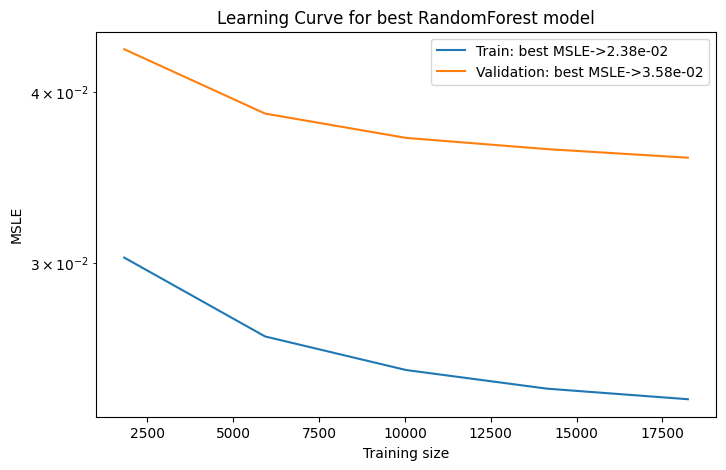




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_gamma_16X.pkl" file !!!


In [21]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100.csv",mag_reg="Gamma",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_gamma_16X")

#### ->Using rowwise-shuffled data

In [8]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv","Gamma",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "Gamma"
Number of Y columns:  4
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 2.0'40.35"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.05491849131374564



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[3.96481216, 3.84276894, 2.52661737, 2.97947562],
       [2.0067821 , 1.93739437, 2.91419147, 3.41420601],
       [2.192003  , 2.37470689, 2.65209457, 3.4941903 ],
       ...,
       [3.94492105, 3.81851809, 3.20472512, 2.55258073],
       [1.88566682, 1.82215684, 1.56591005, 3.82696787],
       [3.12849282, 2.80529144, 2.03080712, 3.189567  ]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
29853,4,4,3,3
17829,2,1,4,4
4645,2,3,2,4
17992,2,2,1,3
14395,1,2,2,4
...,...,...,...,...
28192,4,3,3,1
6012,2,4,3,4
30339,4,4,4,4
6558,3,1,1,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.02440658 0.04236408 0.04691322 0.03894115]
Uniform average
0.038156259023554955
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.22836894 0.43505577 0.48158152 0.4787853 ]
Uniform average
0.40594788176373814



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[3.52807355, 2.64565293, 3.30156772, 2.71022858],
       [1.26571869, 1.92474373, 2.73896673, 3.54951737],
       [2.35701956, 2.36523141, 2.089241  , 3.48637717],
       ...,
       [2.56371118, 2.4633282 , 2.6819781 , 3.38390468],
       [2.12664576, 2.5455239 , 2.92238641, 3.16609602],
       [2.38790637, 3.03095362, 2.84159176, 2.92149068]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
27403,4,2,4,3
1297,1,3,2,3
7285,3,2,2,3
10961,4,2,4,2
16286,1,4,2,3
...,...,...,...,...
22529,3,2,2,3
18187,2,2,2,3
4904,2,3,3,4
19303,2,3,2,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.03264884 0.05801517 0.06622703 0.05187641]
Uniform average
0.052191863262207094
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.31710039 0.62375835 0.70916519 0.65569168]
Uniform average
0.576428901925397



>Learning curve


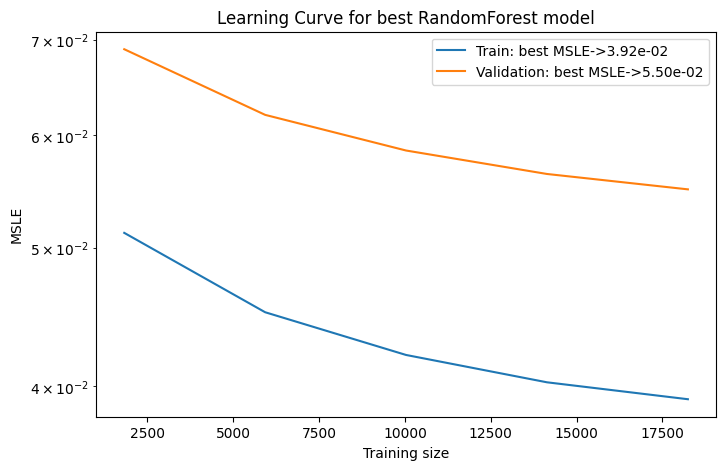




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_gamma_16X_rwsh.pkl" file !!!


In [22]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv",mag_reg="Gamma",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_gamma_16X_rwsh")

### D. Predicting center pressure on maximum mass $P_c(M_{max})$ Values

#### ->Using non-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 2.0'25.30"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.03717227860915308



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 558.83047619, 1294.46061229, 1867.02777407, ...,  557.        ,
       1919.26085467, 1074.09539257])

Actual values of "PcMmax"


,Pc(M_max)
29853,557.0
17829,1324.0
4645,1965.0
17992,1267.0
14395,1864.0
...,...
28192,492.0
6012,1363.0
30339,557.0
6558,1050.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.02170875]
Uniform average
0.021708750490913552
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[21979.22660057]
Uniform average
21979.22660057002



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 769.39725731, 1299.30749536, 1317.70811337, ..., 1692.99464972,
       1228.20620467,  952.08753323])

Actual values of "PcMmax"


,Pc(M_max)
27403,773.0
1297,1282.0
7285,1086.0
10961,699.0
16286,1279.0
...,...
22529,1271.0
18187,1717.0
4904,1647.0
19303,1299.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.03659885]
Uniform average
0.036598848702255465
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[39325.81621296]
Uniform average
39325.816212958765



>Learning curve


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConvers

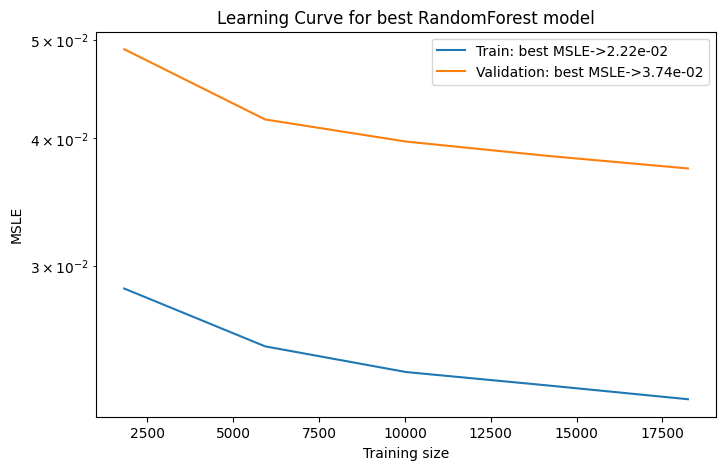




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_PcMmax_16X.pkl" file !!!


In [23]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_PcMmax_16X")

#### ->Using rowwise-shuffled data

In [24]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 2.0'30.70"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.07438876391681942



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 556.35462076, 1291.53045714, 1779.76988119, ...,  556.87702098,
       1622.65459745,  881.44002913])

Actual values of "PcMmax"


,Pc(M_max)
29853,557.0
17829,1324.0
4645,1965.0
17992,1267.0
14395,1864.0
...,...
28192,492.0
6012,1363.0
30339,557.0
6558,1050.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.04416822]
Uniform average
0.044168218735139805
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[36867.19902089]
Uniform average
36867.199020886925



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 716.93183553, 1413.00204733, 1645.73014635, ..., 1608.49107403,
       1152.64968385,  950.10478699])

Actual values of "PcMmax"


,Pc(M_max)
27403,773.0
1297,1282.0
7285,1086.0
10961,699.0
16286,1279.0
...,...
22529,1271.0
18187,1717.0
4904,1647.0
19303,1299.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.07385301]
Uniform average
0.07385300935776816
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[68573.37915965]
Uniform average
68573.3791596459



>Learning curve


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConvers

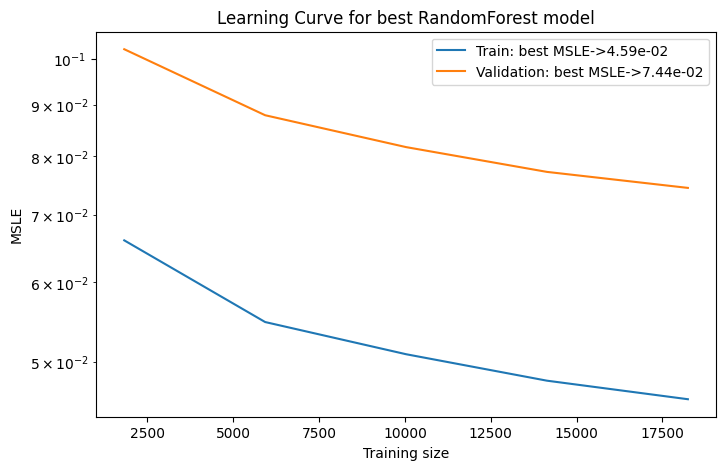




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_PcMmax_16X_rwsh.pkl" file !!!


In [25]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr8s100_rwshuffled.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_PcMmax_16X_rwsh")

## **1.2 Using 16 M-R points**

### A. Predicting Slope $\frac{dP}{dE}=c^2_s$ Values

#### ->Using non-shuffled data

In [26]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 4.0'28.30"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.0018606557728066467



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.18506908, 0.3468085 , 0.54064771, ..., 1.        , 1.        ,
        1.        ],
       [0.07635022, 0.164749  , 0.24606612, ..., 0.67879529, 0.94018903,
        0.98380914],
       [0.06726008, 0.11187562, 0.18312982, ..., 0.54240224, 0.80166599,
        0.97129773],
       ...,
       [0.18506908, 0.3468085 , 0.54064771, ..., 1.        , 1.        ,
        1.        ],
       [0.04230531, 0.09472532, 0.17004156, ..., 0.41167154, 0.6100081 ,
        0.84561445],
       [0.13879583, 0.19758044, 0.30279629, ..., 0.67801582, 0.96051339,
        0.99317124]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
29853,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
17829,0.029799,0.190997,0.307855,0.402585,0.483893,0.733178,1.000000,1.000000
4645,0.076958,0.089186,0.121635,0.308391,0.373410,0.578874,0.860359,1.000000
17992,0.067829,0.047434,0.174548,0.222690,0.263566,0.388325,0.553320,0.755556
14395,0.053047,0.081367,0.243274,0.320498,0.387702,0.599235,0.886995,1.000000
...,...,...,...,...,...,...,...,...
28192,0.185069,0.256501,0.378645,0.468629,0.540909,0.740931,0.965952,0.275235
6012,0.109186,0.209544,0.245212,0.309539,0.363100,0.707140,1.000000,1.000000
30339,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
6558,0.025633,0.112650,0.184724,0.245014,0.298151,0.469608,0.713622,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00026789 0.00061622 0.00101109 0.00102136 0.00079833 0.00116341
 0.00201354 0.00225112]
Uniform average
0.0011428710771263142
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00032212 0.00084044 0.00161789 0.00181166 0.0015689  0.0030425
 0.00570882 0.00600884]
Uniform average
0.0026151467606496696



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------

array([[0.16423244, 0.19434381, 0.28103006, ..., 0.9292746 , 0.99524776,
        0.99721526],
       [0.05853667, 0.08760765, 0.15765584, ..., 0.34462492, 0.49550282,
        0.68499296],
       [0.06583359, 0.1074983 , 0.16329156, ..., 0.42306318, 0.60828855,
        0.80184438],
       ...,
       [0.08235496, 0.15597078, 0.22675257, ..., 0.55218809, 0.78828227,
        0.91871733],
       [0.1124517 , 0.20029473, 0.30716542, ..., 0.55279217, 0.69919551,
        0.79394696],
       [0.13477318, 0.21397585, 0.34623562, ..., 0.62663818, 0.85654927,
        0.98563658]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
27403,0.185069,0.166293,0.220019,0.547424,0.650657,0.953304,1.000000,1.000000
1297,0.065343,0.070036,0.152885,0.195693,0.232261,0.345147,0.497459,0.689001
7285,0.058007,0.088727,0.121030,0.225510,0.266825,0.392778,0.559009,0.762228
10961,0.139575,0.112790,0.331963,0.432918,0.519128,0.780931,0.505879,0.591481
16286,0.128174,0.244510,0.178352,0.210017,0.354887,0.510172,0.704315,0.926398
...,...,...,...,...,...,...,...,...
22529,0.125170,0.130835,0.175517,0.206806,0.349629,0.503318,0.696071,0.917394
18187,0.067829,0.103180,0.139938,0.260155,0.306720,0.446652,0.626792,0.840283
4904,0.076958,0.137308,0.209514,0.265896,0.418848,0.643191,0.943761,1.000000
19303,0.106226,0.187294,0.177150,0.208656,0.471926,0.716803,1.000000,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00033674 0.00079313 0.00144538 0.00144472 0.00119862 0.00191406
 0.00347239 0.00363386]
Uniform average
0.001779863184469137
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00040545 0.00108796 0.00231424 0.00256607 0.0023942  0.005005
 0.00989724 0.00993059]
Uniform average
0.0042000921577285515



>Learning curve


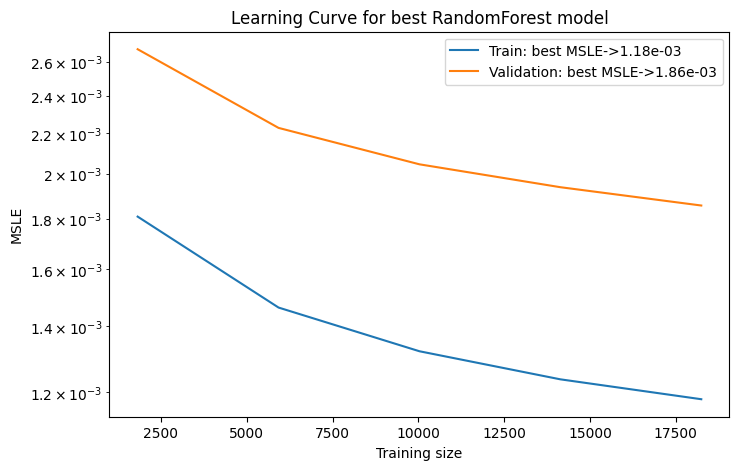




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_dpde_32X.pkl" file !!!


In [27]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100.csv",mag_reg="dPdE",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_dpde_32X")

#### ->Using rowwise-shuffled data

In [28]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 5.0'5.02"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.003869102902234038



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.181956  , 0.33766099, 0.52544432, ..., 0.99127226, 0.99906024,
        0.99223144],
       [0.10343081, 0.17387449, 0.25939728, ..., 0.62689859, 0.84013374,
        0.9298232 ],
       [0.07086591, 0.12196642, 0.1966887 , ..., 0.54454497, 0.79779965,
        0.95013266],
       ...,
       [0.17732612, 0.31344364, 0.48279042, ..., 0.97094853, 0.99490956,
        0.98701432],
       [0.05451659, 0.10388236, 0.17474528, ..., 0.41444996, 0.61026202,
        0.83548341],
       [0.13606516, 0.18724761, 0.28800437, ..., 0.62444539, 0.8520635 ,
        0.94267604]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
29853,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
17829,0.029799,0.190997,0.307855,0.402585,0.483893,0.733178,1.000000,1.000000
4645,0.076958,0.089186,0.121635,0.308391,0.373410,0.578874,0.860359,1.000000
17992,0.067829,0.047434,0.174548,0.222690,0.263566,0.388325,0.553320,0.755556
14395,0.053047,0.081367,0.243274,0.320498,0.387702,0.599235,0.886995,1.000000
...,...,...,...,...,...,...,...,...
28192,0.185069,0.256501,0.378645,0.468629,0.540909,0.740931,0.965952,0.275235
6012,0.109186,0.209544,0.245212,0.309539,0.363100,0.707140,1.000000,1.000000
30339,0.185069,0.346808,0.540648,0.688686,0.809762,1.000000,1.000000,1.000000
6558,0.025633,0.112650,0.184724,0.245014,0.298151,0.469608,0.713622,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00046015 0.00130044 0.00229807 0.00243534 0.00225497 0.00278088
 0.00411144 0.00475913]
Uniform average
0.0025500529217554993
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00055902 0.00178497 0.00369477 0.00439599 0.00438995 0.00720782
 0.01142745 0.01292985]
Uniform average
0.0057987282375537505



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
------------------------------------------------------------------------------------------

array([[0.1548253 , 0.23788242, 0.3758111 , ..., 0.81710302, 0.94003304,
        0.95180273],
       [0.05948165, 0.09405592, 0.16768016, ..., 0.37811697, 0.54968559,
        0.75572138],
       [0.06784084, 0.11211758, 0.17655282, ..., 0.43208873, 0.62416233,
        0.81813287],
       ...,
       [0.08533521, 0.15561422, 0.22700992, ..., 0.53629317, 0.75814813,
        0.88971295],
       [0.12329789, 0.19954288, 0.30365202, ..., 0.6564583 , 0.86464202,
        0.93658708],
       [0.13310755, 0.21533004, 0.34521185, ..., 0.6580609 , 0.81860703,
        0.88126423]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(25),dP_dE(50),dP_dE(75),dP_dE(100),dP_dE(200),dP_dE(400),dP_dE(800)
27403,0.185069,0.166293,0.220019,0.547424,0.650657,0.953304,1.000000,1.000000
1297,0.065343,0.070036,0.152885,0.195693,0.232261,0.345147,0.497459,0.689001
7285,0.058007,0.088727,0.121030,0.225510,0.266825,0.392778,0.559009,0.762228
10961,0.139575,0.112790,0.331963,0.432918,0.519128,0.780931,0.505879,0.591481
16286,0.128174,0.244510,0.178352,0.210017,0.354887,0.510172,0.704315,0.926398
...,...,...,...,...,...,...,...,...
22529,0.125170,0.130835,0.175517,0.206806,0.349629,0.503318,0.696071,0.917394
18187,0.067829,0.103180,0.139938,0.260155,0.306720,0.446652,0.626792,0.840283
4904,0.076958,0.137308,0.209514,0.265896,0.418848,0.643191,0.943761,1.000000
19303,0.106226,0.187294,0.177150,0.208656,0.471926,0.716803,1.000000,1.000000


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00052821 0.00152552 0.00290558 0.00305233 0.00309336 0.00463646
 0.00738605 0.00780768]
Uniform average
0.003866898371824576
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00064118 0.00210861 0.00468967 0.00553908 0.00624255 0.01213617
 0.02087472 0.02200038]
Uniform average
0.009279044218823276



>Learning curve


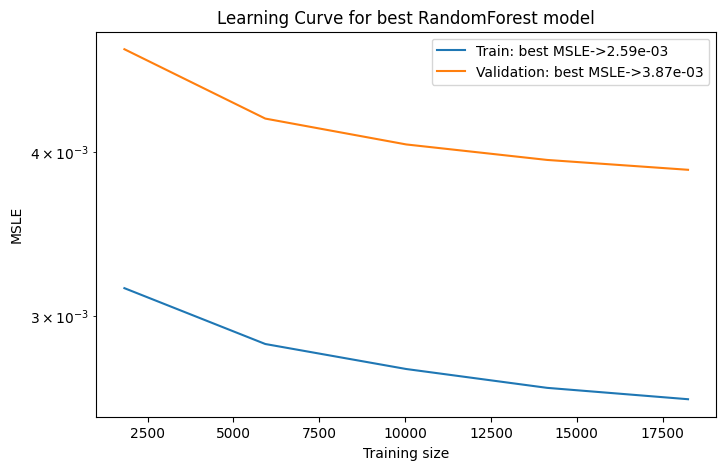




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_dpde_32X_rwsh.pkl" file !!!


In [29]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv",mag_reg="dPdE",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_dpde_32X_rwsh")

### B. Predicting Energy on center $E_c$ Values

#### ->Using non-shuffled data

In [30]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 4.0'20.76"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.003701893086418206



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 206.13550997,  263.34356985,  319.92665433, ...,  499.11269613,
         699.11269613, 1099.11269613],
       [ 316.20668899,  460.22464531,  579.38052929, ...,  914.84142487,
        1164.40397714, 1591.66393783],
       [ 401.66660845,  588.1822541 ,  779.89950351, ..., 1183.9979752 ,
        1476.57672618, 1906.77016615],
       ...,
       [ 206.13550997,  263.34356985,  319.92665433, ...,  499.11217915,
         699.11217915, 1099.11217915],
       [ 421.05530985,  782.74005965,  984.10579679, ..., 1516.66516123,
        1916.68945442, 2471.45158947],
       [ 232.71932751,  317.2921848 ,  426.06117404, ...,  927.45831076,
        1171.78840367, 1581.04513912]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
29853,206.135510,263.343570,319.926654,360.612345,393.972268,499.112505,699.112505,1099.112505
17829,325.586848,498.567816,599.657002,670.184863,726.629588,891.139505,1114.984799,1514.984799
4645,379.824920,535.624272,772.131771,897.790430,971.207686,1181.993520,1459.687963,1869.706162
17992,284.859202,502.044543,809.362556,935.370989,1038.234895,1345.097946,1768.725112,2376.469790
14395,367.022963,589.502870,772.116768,861.042969,931.719969,1135.034446,1403.843898,1810.080612
...,...,...,...,...,...,...,...,...
28192,206.135510,267.396054,346.148905,405.123725,454.622265,609.792109,842.297809,2106.606916
6012,356.348895,452.226902,561.715870,651.886301,726.219623,931.317658,1161.813081,1561.813081
30339,206.135510,263.343570,319.926654,360.612345,393.972268,499.111054,699.111054,1099.111054
6558,380.124889,862.707929,1032.695015,1149.420203,1241.601474,1503.547736,1842.082525,2299.533313


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00527847 0.00319956 0.00211123 0.00159967 0.00164254 0.00100539
 0.00098557 0.00326448]
Uniform average
0.002385864130890545
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[  626.3613294    779.14955087   742.9810075    767.18556088
   926.97309369   942.33547513  1641.14415259 14962.78778442]
Uniform average
2673.6147443099017



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
--------------------------------------------------------------

array([[ 211.28311625,  283.18457252,  402.75996382, ...,  636.79953271,
         839.21541691, 1243.99397184],
       [ 489.18251445,  702.69940051,  925.63236278, ..., 1528.8928694 ,
        2003.13606721, 2676.76942498],
       [ 372.61511908,  563.25866044,  788.76917629, ..., 1314.25946351,
        1710.18926214, 2279.34534434],
       ...,
       [ 351.51091883,  514.02747433,  664.9280552 , ..., 1053.89120507,
        1348.72840151, 1815.28497229],
       [ 284.60091986,  410.86462956,  524.71708218, ...,  874.64861093,
        1181.35861751, 1708.76736389],
       [ 254.38539446,  341.41046716,  435.36207602, ...,  834.38801972,
        1108.57285949, 1548.10520172]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
27403,206.135510,275.673511,404.505879,473.021363,514.763618,639.186987,839.659192,1239.659192
1297,449.116994,688.917394,931.128921,1074.758682,1191.650902,1538.390003,2012.257842,2683.301803
7285,334.783538,538.527863,776.238069,922.739846,1024.332523,1327.582056,1746.656473,2348.665047
10961,276.583390,418.302241,552.477559,617.972227,670.523459,824.417697,1181.406538,1905.075724
16286,302.075586,383.981829,510.689681,639.227324,745.339833,976.073292,1303.783182,1790.679665
...,...,...,...,...,...,...,...,...
22529,229.674954,357.159629,519.744652,650.317354,758.052414,992.090141,1323.963147,1816.104828
18187,284.859202,459.590557,664.603859,789.869233,878.089490,1143.327380,1514.510128,2056.178980
4904,379.824920,521.215682,665.941597,771.194974,854.999709,1043.798167,1295.345065,1696.737884
19303,272.415878,375.439185,514.493553,643.886097,747.590727,916.066641,1143.951321,1543.951321


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00662023 0.00436972 0.00298185 0.00230482 0.00234262 0.00147487
 0.00173768 0.00592065]
Uniform average
0.0034690558688381667
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[  795.8824203   1075.33258705  1095.91499969  1171.16843099
  1398.67744414  1426.60036856  2934.19099736 26823.39520587]
Uniform average
4590.145306744786



>Learning curve


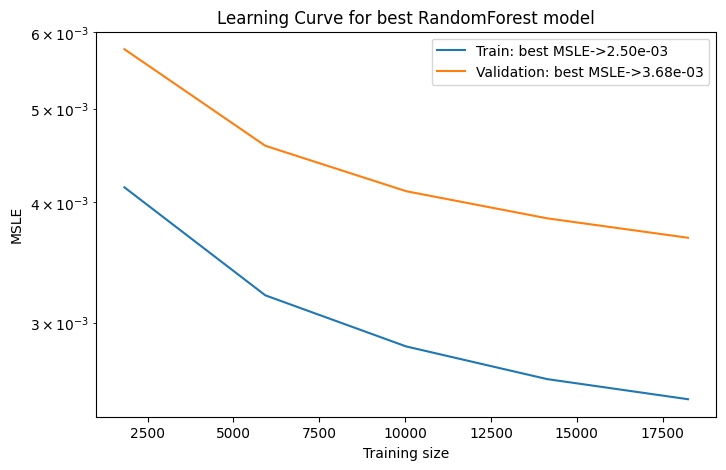




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_enrg_32X.pkl" file !!!


In [31]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100.csv",mag_reg="enrg",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_enrg_32X")

#### ->Using rowwise-shuffled data

In [32]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 4.0'44.10"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.007580557814878594



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 208.12453173,  267.23782583,  328.65026324, ...,  521.51791765,
         726.64492269, 1134.17125183],
       [ 307.45438129,  446.99937598,  573.51577854, ...,  938.90723079,
        1219.02157212, 1683.92436   ],
       [ 404.71267221,  590.01944525,  779.82900826, ..., 1201.51458104,
        1514.70808093, 1974.24003007],
       ...,
       [ 212.73061071,  274.72986787,  339.93436792, ...,  547.40433551,
         756.26903775, 1171.80112489],
       [ 446.84829103,  706.90171651,  914.99872945, ..., 1424.96928946,
        1816.43961441, 2369.09206507],
       [ 245.45298042,  348.30551526,  466.6805317 , ...,  873.97266662,
        1168.97320701, 1661.67579065]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
29853,206.135510,263.343570,319.926654,360.612345,393.972268,499.112505,699.112505,1099.112505
17829,325.586848,498.567816,599.657002,670.184863,726.629588,891.139505,1114.984799,1514.984799
4645,379.824920,535.624272,772.131771,897.790430,971.207686,1181.993520,1459.687963,1869.706162
17992,284.859202,502.044543,809.362556,935.370989,1038.234895,1345.097946,1768.725112,2376.469790
14395,367.022963,589.502870,772.116768,861.042969,931.719969,1135.034446,1403.843898,1810.080612
...,...,...,...,...,...,...,...,...
28192,206.135510,267.396054,346.148905,405.123725,454.622265,609.792109,842.297809,2106.606916
6012,356.348895,452.226902,561.715870,651.886301,726.219623,931.317658,1161.813081,1561.813081
30339,206.135510,263.343570,319.926654,360.612345,393.972268,499.111054,699.111054,1099.111054
6558,380.124889,862.707929,1032.695015,1149.420203,1241.601474,1503.547736,1842.082525,2299.533313


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00808559 0.00561598 0.00506139 0.00449898 0.00463638 0.00302608
 0.00308232 0.00783718]
Uniform average
0.005230488302536859
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[  974.37881628  1333.62060724  1690.93322388  1970.58413398
  2407.54832132  2564.26043834  4746.18477196 33493.48320546]
Uniform average
6147.62418980775



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
----------------------------------------------------------------

array([[ 218.7913746 ,  290.14823216,  378.44321476, ...,  639.31635406,
         868.57460289, 1312.53971544],
       [ 495.72733714,  748.12897595,  952.88214501, ..., 1469.16197177,
        1858.08716504, 2401.32079252],
       [ 394.00498571,  595.63548694,  800.09801267, ..., 1300.50082721,
        1700.89945797, 2285.54037733],
       ...,
       [ 343.96726785,  498.10208162,  655.83199315, ..., 1065.27793614,
        1387.80203913, 1899.47316325],
       [ 273.04370986,  383.1779753 ,  490.76158549, ...,  870.55265289,
        1178.83552525, 1701.41071674],
       [ 258.33714481,  355.11370282,  459.74835226, ...,  832.53844619,
        1137.1239471 , 1686.8164496 ]])

Actual values of "enrg"


,E_c(10),E_c(25),E_c(50),E_c(75),E_c(100),E_c(200),E_c(400),E_c(800)
27403,206.135510,275.673511,404.505879,473.021363,514.763618,639.186987,839.659192,1239.659192
1297,449.116994,688.917394,931.128921,1074.758682,1191.650902,1538.390003,2012.257842,2683.301803
7285,334.783538,538.527863,776.238069,922.739846,1024.332523,1327.582056,1746.656473,2348.665047
10961,276.583390,418.302241,552.477559,617.972227,670.523459,824.417697,1181.406538,1905.075724
16286,302.075586,383.981829,510.689681,639.227324,745.339833,976.073292,1303.783182,1790.679665
...,...,...,...,...,...,...,...,...
22529,229.674954,357.159629,519.744652,650.317354,758.052414,992.090141,1323.963147,1816.104828
18187,284.859202,459.590557,664.603859,789.869233,878.089490,1143.327380,1514.510128,2056.178980
4904,379.824920,521.215682,665.941597,771.194974,854.999709,1043.798167,1295.345065,1696.737884
19303,272.415878,375.439185,514.493553,643.886097,747.590727,916.066641,1143.951321,1543.951321


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00913002 0.00669904 0.00644106 0.00593017 0.00612822 0.00451437
 0.00604733 0.01560813]
Uniform average
0.007562291931191298
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1122.76328299  1635.02554526  2250.29098971  2743.18244331
  3352.72717291  3850.28577342  9318.97590795 63352.22769927]
Uniform average
10953.184851852206



>Learning curve


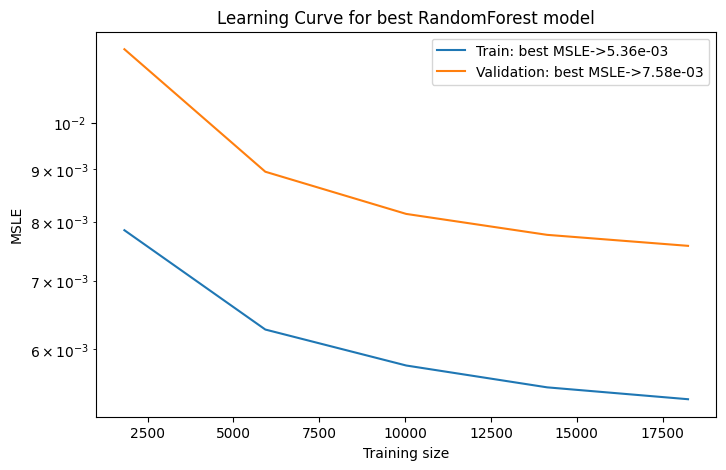




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_enrg_32X_rwsh.pkl" file !!!


In [34]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv",mag_reg="enrg",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_enrg_32X_rwsh")

### C. Predicting polytropic parameter $\Gamma$ Values

#### ->Using non-shuffled data

In [35]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100.csv","Gamma",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "Gamma"
Number of Y columns:  4
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 3.0'49.90"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.028219631452887965



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[4.        , 3.99617582, 2.77183024, 2.84373827],
       [1.51393747, 2.07370193, 3.54397611, 3.53180012],
       [1.67297672, 3.03868206, 2.35570657, 3.64312871],
       ...,
       [3.98118094, 3.98313738, 3.08497025, 3.04530924],
       [2.90827872, 1.1147874 , 1.14073683, 3.93086168],
       [2.75218533, 2.90647224, 1.3646251 , 3.59345026]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
29853,4,4,3,3
17829,2,1,4,4
4645,2,3,2,4
17992,2,2,1,3
14395,1,2,2,4
...,...,...,...,...
28192,4,3,3,1
6012,2,4,3,4
30339,4,4,4,4
6558,3,1,1,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00863525 0.02021678 0.02142751 0.01845043]
Uniform average
0.01718249007463194
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.08158251 0.21073871 0.22142167 0.23836853]
Uniform average
0.1880278548099361



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[3.83944946, 2.2126556 , 3.79827496, 3.30738345],
       [1.39194812, 2.22219002, 2.5421281 , 3.14748489],
       [2.79855556, 2.49119588, 1.65548564, 3.39011045],
       ...,
       [2.37785145, 2.50176199, 3.23446316, 3.35136147],
       [2.44250425, 2.05606747, 3.20040648, 3.38904538],
       [2.06535271, 3.69714248, 2.09266418, 3.23262694]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
27403,4,2,4,3
1297,1,3,2,3
7285,3,2,2,3
10961,4,2,4,2
16286,1,4,2,3
...,...,...,...,...
22529,3,2,2,3
18187,2,2,2,3
4904,2,3,3,4
19303,2,3,2,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01245696 0.03135504 0.03516006 0.02861933]
Uniform average
0.026897848954411135
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.12140237 0.34136696 0.3774176  0.37516451]
Uniform average
0.3038378615987628



>Learning curve


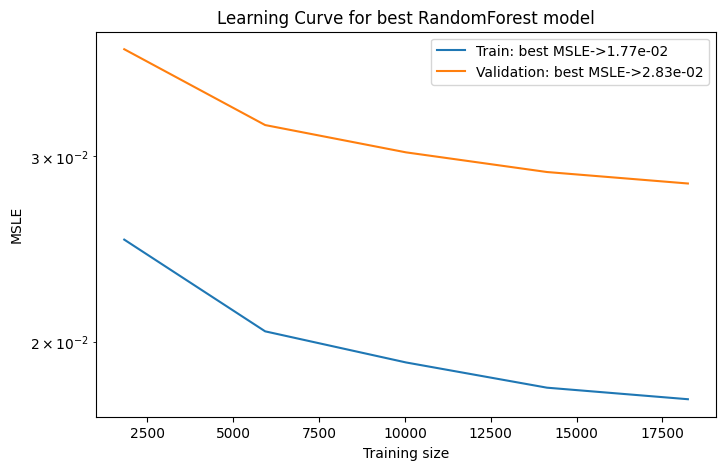




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_gamma_32X.pkl" file !!!


In [36]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100.csv",mag_reg="Gamma",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_gamma_32X")

#### ->Using rowwise-shuffled data

In [37]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv","Gamma",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "Gamma"
Number of Y columns:  4
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 4.0'40.69"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.05935821016134031



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[3.86859373, 3.7234968 , 2.65125729, 2.55904295],
       [2.04774612, 2.11503606, 2.97034107, 3.34121728],
       [1.65542198, 2.88273076, 2.64117601, 3.34140749],
       ...,
       [3.75210236, 3.54763636, 3.01292156, 2.88675418],
       [2.0750242 , 1.69708261, 1.78157373, 3.75902392],
       [2.6717108 , 2.93650163, 2.11910116, 3.18635365]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
29853,4,4,3,3
17829,2,1,4,4
4645,2,3,2,4
17992,2,2,1,3
14395,1,2,2,4
...,...,...,...,...
28192,4,3,3,1
6012,2,4,3,4
30339,4,4,4,4
6558,3,1,1,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.03155875 0.04349237 0.0462432  0.03727106]
Uniform average
0.03964134324015807
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.28715371 0.44095375 0.46795336 0.45752857]
Uniform average
0.4133973475416934



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "Gamma"


array([[3.53321863, 3.00241464, 3.14653601, 2.77843976],
       [1.43110409, 2.40062175, 2.24308293, 3.49601031],
       [2.08366203, 1.99440645, 2.03805911, 3.60303391],
       ...,
       [2.03439178, 2.94097068, 2.98755024, 3.28747988],
       [2.19280084, 2.89462097, 2.83345856, 3.11169207],
       [2.35856415, 3.03891439, 2.43150091, 2.89886422]])

Actual values of "Gamma"


,Gamma_1,Gamma_2,Gamma_3,Gamma_4
27403,4,2,4,3
1297,1,3,2,3
7285,3,2,2,3
10961,4,2,4,2
16286,1,4,2,3
...,...,...,...,...
22529,3,2,2,3
18187,2,2,2,3
4904,2,3,3,4
19303,2,3,2,4


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.04361307 0.06296287 0.06898979 0.05122267]
Uniform average
0.05669709883781407
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.41678551 0.67308971 0.73217821 0.64620197]
Uniform average
0.6170638506316852



>Learning curve


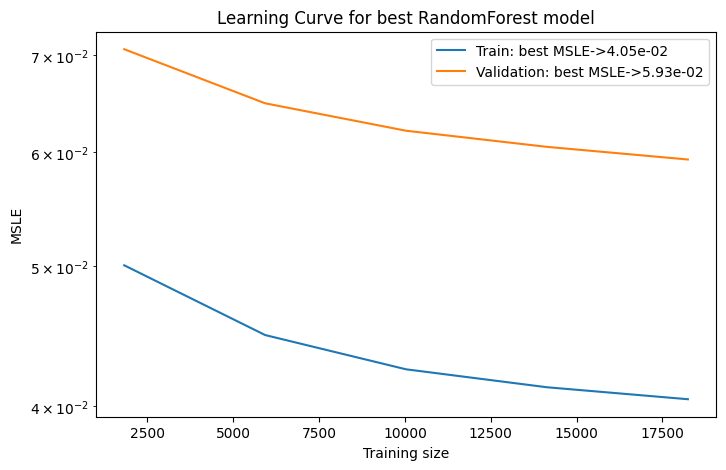




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_gamma_32X_rwsh.pkl" file !!!


In [38]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv",mag_reg="Gamma",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_gamma_32X_rwsh")

### D. Predicting center pressure on maximum mass $P_c(M_{max})$ Values

#### ->Using non-shuffled data

In [39]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 4.0'5.01"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.03199987667733356



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 557.        , 1413.33937228, 1943.59755872, ...,  557.        ,
       1130.99996688, 1208.77343072])

Actual values of "PcMmax"


,Pc(M_max)
29853,557.0
17829,1324.0
4645,1965.0
17992,1267.0
14395,1864.0
...,...
28192,492.0
6012,1363.0
30339,557.0
6558,1050.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01726376]
Uniform average
0.017263755165246267
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[16895.05643032]
Uniform average
16895.05643031588



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 785.71354228, 1286.21309035, 1488.60066618, ..., 1521.26579483,
       1110.55568163,  981.53445804])

Actual values of "PcMmax"


,Pc(M_max)
27403,773.0
1297,1282.0
7285,1086.0
10961,699.0
16286,1279.0
...,...
22529,1271.0
18187,1717.0
4904,1647.0
19303,1299.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.03081341]
Uniform average
0.030813407749277044
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[32870.24595656]
Uniform average
32870.24595656489



>Learning curve


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConvers

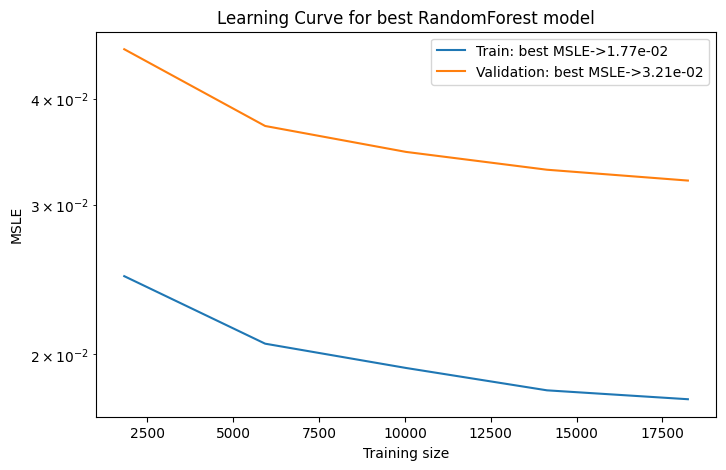




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_PcMmax_32X.pkl" file !!!


In [40]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_PcMmax_32X")

#### ->Using rowwise-shuffled data

In [41]:
# Showing the datasets
# regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 4.0'19.68"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.10087540001333362



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 581.94478467, 1264.57187151, 1821.76762011, ...,  557.60921724,
       1365.95324099,  942.37233331])

Actual values of "PcMmax"


,Pc(M_max)
29853,557.0
17829,1324.0
4645,1965.0
17992,1267.0
14395,1864.0
...,...
28192,492.0
6012,1363.0
30339,557.0
6558,1050.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.0582235]
Uniform average
0.05822349826185985
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[39444.80810577]
Uniform average
39444.80810576575



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([ 702.7335252 , 1736.52425073, 1462.82209369, ..., 1471.62271372,
       1061.1812347 ,  826.61759708])

Actual values of "PcMmax"


,Pc(M_max)
27403,773.0
1297,1282.0
7285,1086.0
10961,699.0
16286,1279.0
...,...
22529,1271.0
18187,1717.0
4904,1647.0
19303,1299.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.09886887]
Uniform average
0.09886886941549344
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[80092.64725429]
Uniform average
80092.64725429061



>Learning curve


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConvers

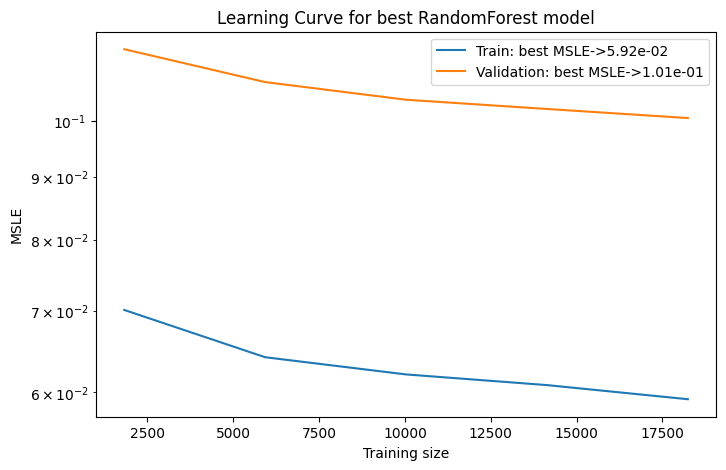




>Saving the grid search info:
The grid search info is saved in the "NS_rf_grid_PcMmax_32X_rwsh.pkl" file !!!


In [42]:
# Building a regression model
regression_ML("NS_reg_data_pp8mr16s100_rwshuffled.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="NS_rf_grid_PcMmax_32X_rwsh")

# 2. Quark Stars

## **2.1 Using 8 M-R points**

### A. Predicting Slope $\frac{dP}{dE}=c^2_s$ Values

#### ->Using non-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr8s100.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 5.0'13.47"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.0004004519548613132



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.51407883, 0.47473805, 0.43499604, ..., 0.39322414, 0.38809093,
        0.38403771],
       [0.48358726, 0.44236535, 0.4077972 , ..., 0.37601399, 0.37230345,
        0.36939279],
       [0.42438004, 0.39718942, 0.37636841, ..., 0.35796902, 0.35584021,
        0.35417096],
       ...,
       [0.36433108, 0.35635783, 0.34949212, ..., 0.34290801, 0.3421151 ,
        0.34148882],
       [0.67477165, 0.5712957 , 0.48889438, ..., 0.41820534, 0.4103332 ,
        0.40421882],
       [0.38607534, 0.37108526, 0.35915338, ..., 0.34834153, 0.34707235,
        0.34607409]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
32262,0.468992,0.437713,0.407627,0.388967,0.382096,0.377207,0.373508,0.370587
15851,0.459864,0.422123,0.392924,0.376918,0.371295,0.367364,0.364421,0.362116
4762,0.375856,0.361615,0.352067,0.347077,0.345339,0.344124,0.343213,0.342499
5369,0.481106,0.429357,0.395145,0.377803,0.371885,0.367791,0.364749,0.362377
27981,0.440641,0.414161,0.390167,0.375760,0.370512,0.366790,0.363979,0.361761
...,...,...,...,...,...,...,...,...
32469,0.508325,0.468362,0.429286,0.404922,0.395957,0.389587,0.384775,0.380981
16317,0.575014,0.506055,0.448937,0.417032,0.405850,0.398062,0.392257,0.387726
12895,0.345426,0.342025,0.339355,0.337841,0.337296,0.336910,0.336618,0.336388
6012,0.664680,0.562661,0.482583,0.439622,0.424874,0.414697,0.407165,0.401316


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[5.94416956e-04 4.19965916e-04 2.41164702e-04 1.42180403e-04
 1.10467674e-04 8.98949302e-05 7.55460328e-05 6.50057185e-05]
Uniform average
0.00021733029147335384
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00130614 0.00088661 0.00048694 0.0002785  0.00021388 0.00017259
 0.00014411 0.00012337]
Uniform average
0.00045151636265875573



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
--------------------------------------------------------

array([[0.47229978, 0.43920769, 0.40811264, ..., 0.37700769, 0.37325388,
        0.37029632],
       [0.67085973, 0.56378854, 0.48225726, ..., 0.41417271, 0.40665997,
        0.40083089],
       [0.47369456, 0.44737556, 0.41827975, ..., 0.3850383 , 0.3807744 ,
        0.3773817 ],
       ...,
       [0.68691885, 0.57605033, 0.49037171, ..., 0.41845436, 0.41051796,
        0.4043618 ],
       [0.38870178, 0.37397018, 0.3615413 , ..., 0.34983447, 0.34844139,
        0.34734398],
       [0.43411118, 0.41165134, 0.3896641 , ..., 0.36682915, 0.36401594,
        0.36179073]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
4484,0.346906,0.342535,0.339519,0.337909,0.337342,0.336944,0.336645,0.336409
3943,0.674107,0.566299,0.483741,0.440079,0.425175,0.414914,0.407330,0.401447
46761,0.570864,0.531659,0.483988,0.449243,0.435552,0.425564,0.417890,0.411771
5042,0.420040,0.390020,0.370292,0.360183,0.356702,0.354281,0.352475,0.351062
49298,0.540687,0.507815,0.467170,0.437057,0.425074,0.416289,0.409515,0.404097
...,...,...,...,...,...,...,...,...
32199,0.451122,0.423975,0.397977,0.381853,0.375907,0.371671,0.368464,0.365929
1778,0.657044,0.547810,0.469682,0.429710,0.416208,0.406942,0.400104,0.394806
4038,0.700208,0.588726,0.499618,0.451505,0.434983,0.423590,0.415165,0.408627
17495,0.391979,0.375475,0.362292,0.354840,0.352175,0.350296,0.348880,0.347764


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00107716 0.00076225 0.00043773 0.00025805 0.0002005  0.00016316
 0.00013713 0.000118  ]
Uniform average
0.0003942467733296246
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00236504 0.00160625 0.00088208 0.00050461 0.0003876  0.00031283
 0.00026125 0.00022369]
Uniform average
0.0008179184459779166



>Learning curve


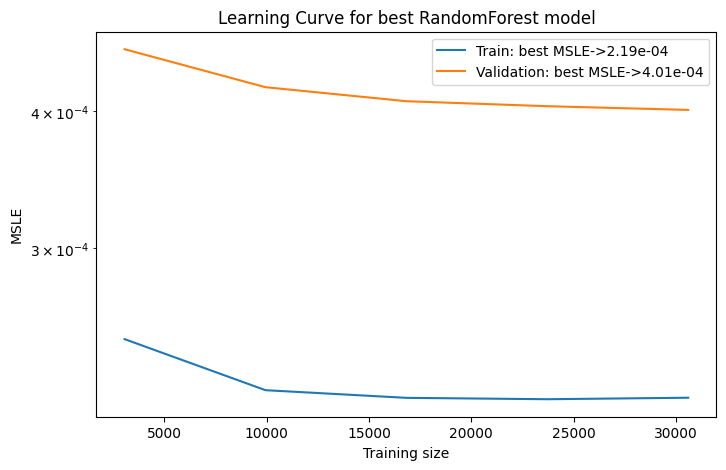




>Saving the grid search info:
The grid search info is saved in the "QS_rf_grid_dpde_16X.pkl" file !!!


In [43]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr8s100.csv",mag_reg="dPdE",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="QS_rf_grid_dpde_16X")

#### ->Using rowwise-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr8s100_rwshuffled.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 6.0'50.09"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.000638579651065601



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.5103159 , 0.47008428, 0.43070178, ..., 0.3902893 , 0.38537557,
        0.38150205],
       [0.46799899, 0.43223013, 0.40151469, ..., 0.37258497, 0.36917505,
        0.36649726],
       [0.41476091, 0.39098832, 0.37236419, ..., 0.35569084, 0.35375518,
        0.3522371 ],
       ...,
       [0.38721653, 0.37384657, 0.36191132, ..., 0.35021208, 0.34879754,
        0.34768074],
       [0.6469923 , 0.55126727, 0.47599993, ..., 0.41147356, 0.40426879,
        0.39866851],
       [0.37703568, 0.36528717, 0.35549983, ..., 0.34629793, 0.34520274,
        0.34434   ]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
32262,0.468992,0.437713,0.407627,0.388967,0.382096,0.377207,0.373508,0.370587
15851,0.459864,0.422123,0.392924,0.376918,0.371295,0.367364,0.364421,0.362116
4762,0.375856,0.361615,0.352067,0.347077,0.345339,0.344124,0.343213,0.342499
5369,0.481106,0.429357,0.395145,0.377803,0.371885,0.367791,0.364749,0.362377
27981,0.440641,0.414161,0.390167,0.375760,0.370512,0.366790,0.363979,0.361761
...,...,...,...,...,...,...,...,...
32469,0.508325,0.468362,0.429286,0.404922,0.395957,0.389587,0.384775,0.380981
16317,0.575014,0.506055,0.448937,0.417032,0.405850,0.398062,0.392257,0.387726
12895,0.345426,0.342025,0.339355,0.337841,0.337296,0.336910,0.336618,0.336388
6012,0.664680,0.562661,0.482583,0.439622,0.424874,0.414697,0.407165,0.401316


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00097134 0.00067793 0.00038262 0.00022323 0.00017285 0.00014035
 0.00011776 0.00010122]
Uniform average
0.00034841322930273847
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00214055 0.00143209 0.00077206 0.00043686 0.00033434 0.0002692
 0.00022444 0.00019193]
Uniform average
0.0007251854848425638



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
------------------------------------------------------------------------------------------

array([[0.48571688, 0.45105309, 0.41732032, ..., 0.38263378, 0.37840285,
        0.37506502],
       [0.64997808, 0.55171839, 0.47560873, ..., 0.4110353 , 0.40385566,
        0.39827822],
       [0.46109683, 0.43647805, 0.40976559, ..., 0.3796831 , 0.37584841,
        0.37280012],
       ...,
       [0.64451684, 0.54564693, 0.4708915 , ..., 0.40830872, 0.40137939,
        0.39599866],
       [0.43489656, 0.41100682, 0.38852163, ..., 0.36580372, 0.36304115,
        0.36086107],
       [0.46590004, 0.43701924, 0.4081149 , ..., 0.37771177, 0.37395765,
        0.37098893]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
4484,0.346906,0.342535,0.339519,0.337909,0.337342,0.336944,0.336645,0.336409
3943,0.674107,0.566299,0.483741,0.440079,0.425175,0.414914,0.407330,0.401447
46761,0.570864,0.531659,0.483988,0.449243,0.435552,0.425564,0.417890,0.411771
5042,0.420040,0.390020,0.370292,0.360183,0.356702,0.354281,0.352475,0.351062
49298,0.540687,0.507815,0.467170,0.437057,0.425074,0.416289,0.409515,0.404097
...,...,...,...,...,...,...,...,...
32199,0.451122,0.423975,0.397977,0.381853,0.375907,0.371671,0.368464,0.365929
1778,0.657044,0.547810,0.469682,0.429710,0.416208,0.406942,0.400104,0.394806
4038,0.700208,0.588726,0.499618,0.451505,0.434983,0.423590,0.415165,0.408627
17495,0.391979,0.375475,0.362292,0.354840,0.352175,0.350296,0.348880,0.347764


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00176318 0.00122569 0.00068986 0.00040214 0.00031135 0.00025281
 0.00021214 0.00018235]
Uniform average
0.0006299397004822945
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00387611 0.00257889 0.00138673 0.00078453 0.00060057 0.0004837
 0.00040338 0.00034504]
Uniform average
0.0013073702393378189



>Learning curve


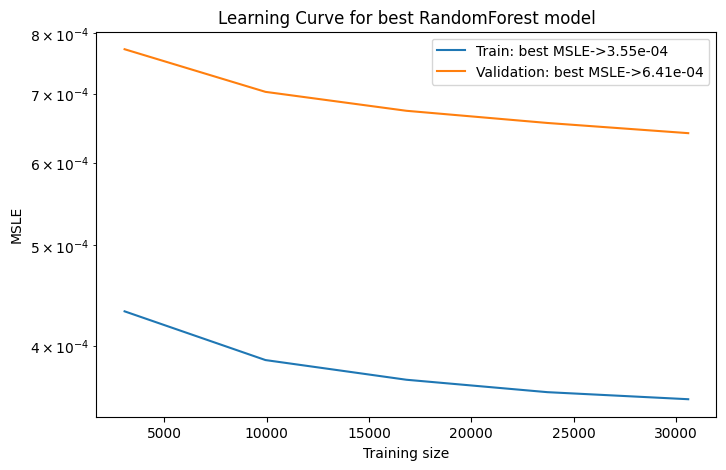




>Saving the grid search info:
The grid search info is saved in the "QS_rf_grid_dpde_16X_rwsh.pkl" file !!!


In [44]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr8s100_rwshuffled.csv",mag_reg="dPdE",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="QS_rf_grid_dpde_16X_rwsh")

### B. Predicting Energy on center $E_c$ Values

#### ->Using non-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr8s100.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 4.0'29.05"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.002249351838609645



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 392.23364285,  581.3161912 , 1035.4445919 , ..., 2774.37301105,
        3292.14408622, 3815.48162567],
       [ 306.30941279,  502.36165897,  975.93259896, ..., 2777.31539153,
        3310.57156964, 3848.57765596],
       [ 267.94074025,  493.35024939, 1021.18683159, ..., 2957.15536837,
        3520.98763249, 4087.47890919],
       ...,
       [ 389.55614167,  636.67967926, 1198.11950418, ..., 3207.95057444,
        3787.86646675, 4369.22343266],
       [ 170.0335362 ,  318.4258463 ,  705.99439586, ..., 2296.46795365,
        2781.97535727, 3275.52670332],
       [ 321.72274898,  562.03959784, 1113.33539335, ..., 3101.69875486,
        3677.01617128, 4254.13699828]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
32262,422.392386,621.810029,1097.845446,1853.594504,2372.663225,2899.641470,3432.582888,3970.228572
15851,287.298480,492.925405,987.178599,1769.081242,2303.965357,2845.644645,3392.352528,3942.976574
4762,263.573512,508.602598,1070.603022,1929.736762,2507.521843,3087.738373,3669.728711,4253.087108
5369,209.068770,409.184602,898.729128,1677.830769,2211.686541,2752.631515,3298.781303,3848.962662
27981,400.169283,611.666433,1111.575380,1897.084443,2433.330495,2975.993141,3523.453928,4074.678336
...,...,...,...,...,...,...,...,...
32469,398.869214,584.142983,1033.057898,1755.370947,2255.196081,2764.618484,3281.315805,3803.774126
16317,247.596679,415.884851,839.758664,1536.735095,2023.305028,2521.145880,3027.445210,3540.395936
12895,370.043469,632.092264,1219.553481,2105.844489,2698.347337,3291.654830,3885.552838,4479.908121
6012,173.091699,322.002527,710.992105,1366.742437,1830.029258,2306.803251,2793.719210,3288.621535


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00268445 0.00064601 0.00107886 0.00149388 0.00154018 0.00151868
 0.00146903 0.0014089 ]
Uniform average
0.0014799976653036228
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[  498.82397666   274.37588501  1183.49029431  4852.7194674
  8283.63977221 12269.78068954 16692.44970102 21470.0181906 ]
Uniform average
8190.662247093148



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
---------------------------------------------------------------

array([[ 344.23228832,  554.48247031, 1050.4161607 , ..., 2900.18534389,
        3443.8412465 , 3991.42902142],
       [ 160.8621424 ,  308.09509521,  694.30549549, ..., 2282.95798889,
        2768.18403471, 3261.4971784 ],
       [ 530.38521041,  725.95251323, 1188.31634726, ..., 2938.96627048,
        3458.54547692, 3983.40007504],
       ...,
       [ 156.06241173,  300.8852211 ,  682.14892899, ..., 2257.67709916,
        2739.85635353, 3230.32007405],
       [ 345.99184003,  580.72056687, 1121.35065563, ..., 3082.54748448,
        3651.62830397, 4222.9269024 ],
       [ 413.53247037,  634.24615032, 1147.32786269, ..., 3036.14337564,
        3588.39349848, 4143.93876104]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
4484,292.260609,553.659409,1140.632177,2026.650945,2619.056276,3212.294784,3806.140683,4400.454813
3943,160.621511,308.144588,695.643556,1350.374926,1813.265219,2289.749411,2776.441667,3271.164559
46761,544.141070,707.926847,1104.305871,1750.368703,2202.890529,2667.681235,3142.108931,3624.366575
5042,234.342556,458.285849,987.277628,1810.465357,2368.622630,2931.328901,3497.360625,4065.960688
49298,612.123005,784.261036,1196.790937,1863.154006,2327.516212,2803.185046,3287.730823,3779.486496
...,...,...,...,...,...,...,...,...
32199,435.513310,642.039217,1131.276683,1902.948726,2431.090894,2966.310657,3506.854944,4051.593372
1778,151.010613,303.207014,703.169984,1375.418536,1848.846392,2335.108675,2830.947868,3334.288088
4038,157.980021,299.828250,673.830015,1310.107719,1761.959862,2228.216557,2705.348470,3191.068175
17495,349.353181,584.723573,1128.702373,1966.654258,2532.553670,3102.052309,3674.205570,4248.421470


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00361787 0.00073797 0.0016249  0.00233626 0.00241795 0.00238736
 0.00231045 0.00221621]
Uniform average
0.0022061216236893295
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[  656.91634238   306.51190351  1770.21777394  7611.34380554
 13054.69610495 19369.01243109 26367.04848563 33920.32485466]
Uniform average
12882.008962713731



>Learning curve


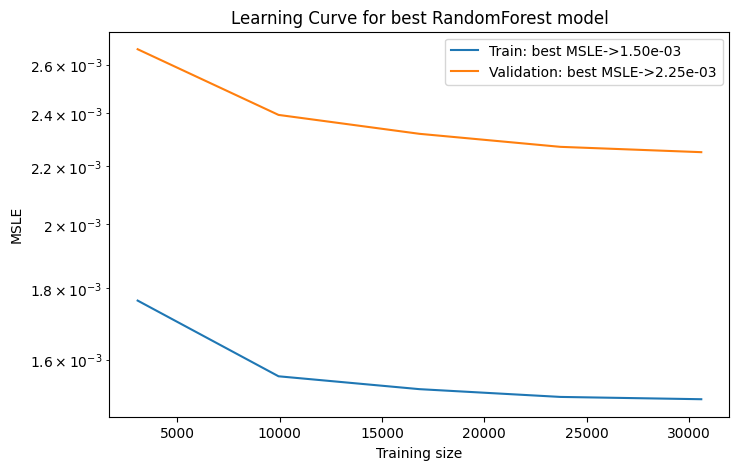




>Saving the grid search info:
The grid search info is saved in the "QS_rf_grid_enrg_16X.pkl" file !!!


In [45]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr8s100.csv",mag_reg="enrg",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="QS_rf_grid_enrg_16X")

#### ->Using rowwise-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr8s100_rwshuffled.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 6.0'26.63"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.003895752416492958



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 375.87884053,  560.27768166, 1005.52138799, ..., 2721.26753394,
        3233.64316244, 3751.92834941],
       [ 291.35104043,  497.76793756,  989.84334887, ..., 2835.63349466,
        3378.84171558, 3926.09370492],
       [ 294.89047856,  509.50660433, 1015.8522482 , ..., 2895.73640958,
        3446.59662418, 4000.96175075],
       ...,
       [ 396.34973675,  641.63759824, 1199.75358109, ..., 3201.34273611,
        3779.38171089, 4358.98897681],
       [ 182.26790213,  335.52446091,  732.11984262, ..., 2344.73439327,
        2835.23388215, 3333.42754784],
       [ 340.16835699,  574.31723951, 1113.70068938, ..., 3071.54671207,
        3639.85035744, 4210.42268819]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
32262,422.392386,621.810029,1097.845446,1853.594504,2372.663225,2899.641470,3432.582888,3970.228572
15851,287.298480,492.925405,987.178599,1769.081242,2303.965357,2845.644645,3392.352528,3942.976574
4762,263.573512,508.602598,1070.603022,1929.736762,2507.521843,3087.738373,3669.728711,4253.087108
5369,209.068770,409.184602,898.729128,1677.830769,2211.686541,2752.631515,3298.781303,3848.962662
27981,400.169283,611.666433,1111.575380,1897.084443,2433.330495,2975.993141,3523.453928,4074.678336
...,...,...,...,...,...,...,...,...
32469,398.869214,584.142983,1033.057898,1755.370947,2255.196081,2764.618484,3281.315805,3803.774126
16317,247.596679,415.884851,839.758664,1536.735095,2023.305028,2521.145880,3027.445210,3540.395936
12895,370.043469,632.092264,1219.553481,2105.844489,2698.347337,3291.654830,3885.552838,4479.908121
6012,173.091699,322.002527,710.992105,1366.742437,1830.029258,2306.803251,2793.719210,3288.621535


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00509298 0.00127464 0.00168778 0.0021923  0.00222658 0.00217548
 0.00209125 0.0019965 ]
Uniform average
0.0023421893187426457
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[  794.57301643   483.72738945  1763.81064711  6893.80198736
 11673.83377287 17216.56189322 23357.15651768 29982.74334161]
Uniform average
11520.776070717047



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------

array([[ 306.46787921,  531.26671458, 1054.84588629, ..., 2974.94576465,
        3534.74196533, 4097.396527  ],
       [ 170.46572845,  326.00210978,  729.36398562, ..., 2363.69499548,
        2859.5438654 , 3362.79562247],
       [ 490.05747067,  703.18778623, 1200.44518224, ..., 3045.28163805,
        3587.06761031, 4132.77186923],
       ...,
       [ 166.67024634,  316.95452887,  708.96549838, ..., 2312.0675295 ,
        2800.57002089, 3296.93345388],
       [ 392.67699572,  601.02246984, 1091.89205489, ..., 2925.81637379,
        3465.57015585, 4009.46551736],
       [ 413.42877041,  624.27509305, 1119.11846563, ..., 2961.79084563,
        3503.44136314, 4049.0874898 ]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
4484,292.260609,553.659409,1140.632177,2026.650945,2619.056276,3212.294784,3806.140683,4400.454813
3943,160.621511,308.144588,695.643556,1350.374926,1813.265219,2289.749411,2776.441667,3271.164559
46761,544.141070,707.926847,1104.305871,1750.368703,2202.890529,2667.681235,3142.108931,3624.366575
5042,234.342556,458.285849,987.277628,1810.465357,2368.622630,2931.328901,3497.360625,4065.960688
49298,612.123005,784.261036,1196.790937,1863.154006,2327.516212,2803.185046,3287.730823,3779.486496
...,...,...,...,...,...,...,...,...
32199,435.513310,642.039217,1131.276683,1902.948726,2431.090894,2966.310657,3506.854944,4051.593372
1778,151.010613,303.207014,703.169984,1375.418536,1848.846392,2335.108675,2830.947868,3334.288088
4038,157.980021,299.828250,673.830015,1310.107719,1761.959862,2228.216557,2705.348470,3191.068175
17495,349.353181,584.723573,1128.702373,1966.654258,2532.553670,3102.052309,3674.205570,4248.421470


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00678034 0.00160524 0.00293218 0.00391971 0.00398273 0.00388785
 0.00373335 0.00356068]
Uniform average
0.0038002592818346414
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1070.86542221   576.34172573  3033.48415767 12423.36335487
 21079.3251379  31072.81116992 42112.28442451 53998.81483485]
Uniform average
20670.91127845695



>Learning curve


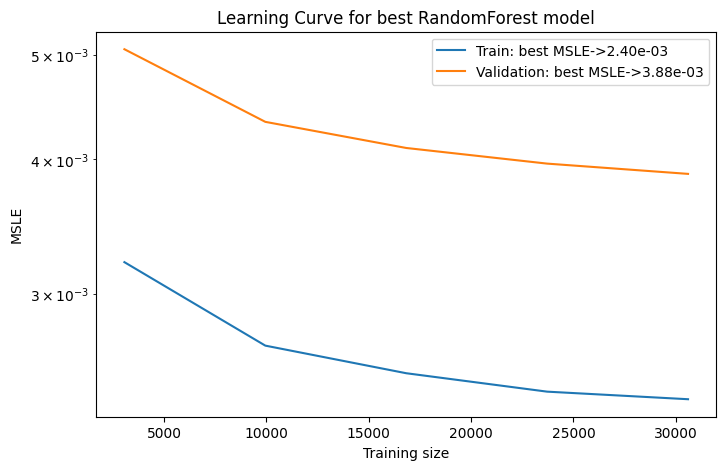




>Saving the grid search info:
The grid search info is saved in the "QS_rf_grid_enrg_16X_rwsh.pkl" file !!!


In [46]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr8s100_rwshuffled.csv",mag_reg="enrg",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="QS_rf_grid_enrg_16X_rwsh")

### C. Predicting center pressure on maximum mass $P_c(M_{max})$ Values

#### ->Using non-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr8s100.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 3.0'42.22"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.006195171601702217



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([506.52035168, 373.57586356, 302.6955097 , ..., 460.26954323,
       220.88032061, 384.01642394])

Actual values of "PcMmax"


,Pc(M_max)
32262,522.0
15851,350.0
4762,297.0
5369,249.0
27981,501.0
...,...
32469,500.0
16317,314.0
12895,439.0
6012,227.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00389867]
Uniform average
0.003898674225025655
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[1036.56925629]
Uniform average
1036.5692562919135



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([413.16373652, 208.47917182, 646.26942128, ..., 207.91615292,
       417.47175732, 520.75888768])

Actual values of "PcMmax"


,Pc(M_max)
4484,338.0
3943,213.0
46761,712.0
5042,274.0
49298,801.0
...,...
32199,539.0
1778,197.0
4038,210.0
17495,419.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00616799]
Uniform average
0.006167992503593874
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[1628.49673849]
Uniform average
1628.496738490741



>Learning curve


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConvers

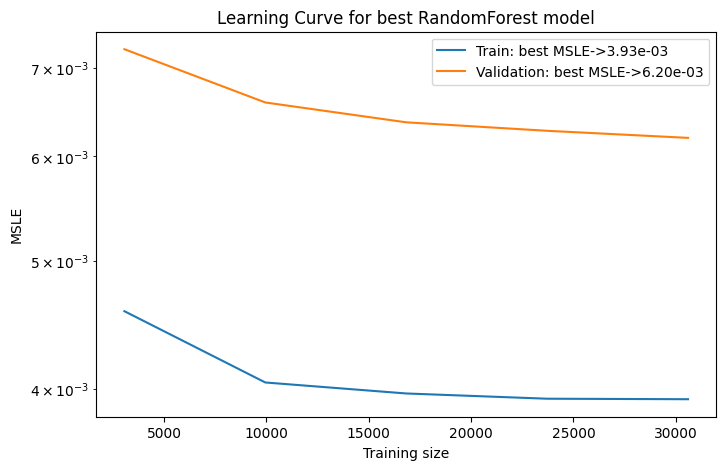




>Saving the grid search info:
The grid search info is saved in the "QS_rf_grid_PcMmax_16X.pkl" file !!!


In [47]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr8s100.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="QS_rf_grid_PcMmax_16X")

#### ->Using rowwise-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr8s100_rwshuffled.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  16
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 4.0'11.88"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.010246967398122545



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([516.13089413, 356.20390109, 342.93527472, ..., 463.43638423,
       229.19204448, 389.20855893])

Actual values of "PcMmax"


,Pc(M_max)
32262,522.0
15851,350.0
4762,297.0
5369,249.0
27981,501.0
...,...
32469,500.0
16317,314.0
12895,439.0
6012,227.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00568372]
Uniform average
0.005683720571332782
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[1305.86821823]
Uniform average
1305.868218229933



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([488.64252526, 217.00619114, 643.38538401, ..., 207.20764641,
       465.65729714, 505.04617256])

Actual values of "PcMmax"


,Pc(M_max)
4484,338.0
3943,213.0
46761,712.0
5042,274.0
49298,801.0
...,...
32199,539.0
1778,197.0
4038,210.0
17495,419.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.01038496]
Uniform average
0.010384957183316093
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[2399.29769413]
Uniform average
2399.29769413014



>Learning curve


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConvers

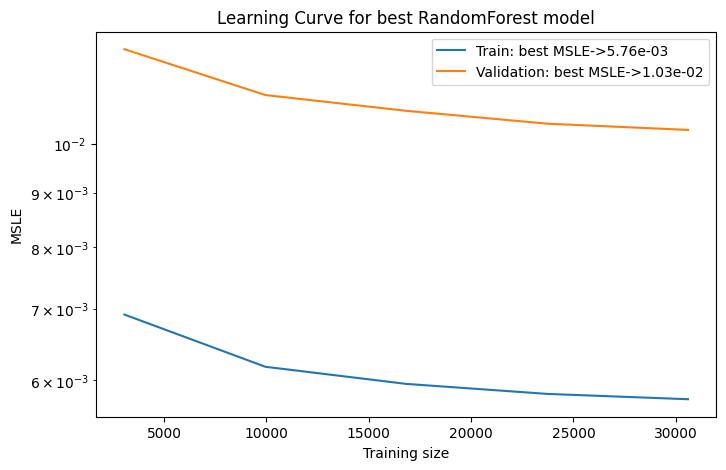




>Saving the grid search info:
The grid search info is saved in the "QS_rf_grid_PcMmax_16X_rwsh.pkl" file !!!


In [48]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr8s100_rwshuffled.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="QS_rf_grid_PcMmax_16X_rwsh")

## **2.2 Using 16 M-R points**

### A. Predicting Slope $\frac{dP}{dE}=c^2_s$ Values

#### ->Using non-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr16s100.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 8.0'53.04"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.00032083335977891973



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.45983162, 0.43240393, 0.40486186, ..., 0.37584919, 0.37226305,
        0.36942631],
       [0.43885399, 0.40708841, 0.38284854, ..., 0.36163376, 0.3591888 ,
        0.35727242],
       [0.38336708, 0.36753014, 0.35619412, ..., 0.34648637, 0.34536771,
        0.34448981],
       ...,
       [0.37592016, 0.36560131, 0.35623914, ..., 0.34696348, 0.34583463,
        0.34494203],
       [0.66134647, 0.56199448, 0.48299232, ..., 0.415168  , 0.40760331,
        0.40172524],
       [0.35846918, 0.35111133, 0.34547883, ..., 0.34042366, 0.33982931,
        0.33936141]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
32262,0.468992,0.437713,0.407627,0.388967,0.382096,0.377207,0.373508,0.370587
15851,0.459864,0.422123,0.392924,0.376918,0.371295,0.367364,0.364421,0.362116
4762,0.375856,0.361615,0.352067,0.347077,0.345339,0.344124,0.343213,0.342499
5369,0.481106,0.429357,0.395145,0.377803,0.371885,0.367791,0.364749,0.362377
27981,0.440641,0.414161,0.390167,0.375760,0.370512,0.366790,0.363979,0.361761
...,...,...,...,...,...,...,...,...
32469,0.508325,0.468362,0.429286,0.404922,0.395957,0.389587,0.384775,0.380981
16317,0.575014,0.506055,0.448937,0.417032,0.405850,0.398062,0.392257,0.387726
12895,0.345426,0.342025,0.339355,0.337841,0.337296,0.336910,0.336618,0.336388
6012,0.664680,0.562661,0.482583,0.439622,0.424874,0.414697,0.407165,0.401316


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[4.19534433e-04 2.96821161e-04 1.71034432e-04 1.01059796e-04
 7.85747172e-05 6.39698343e-05 5.37747737e-05 4.62813151e-05]
Uniform average
0.00015388130782132103
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[9.21063663e-04 6.27115078e-04 3.45822489e-04 1.98219710e-04
 1.52318182e-04 1.22955599e-04 1.02688755e-04 8.79223612e-05]
Uniform average
0.000319763229700279



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
--------------------------

array([[0.36492324, 0.35586562, 0.34877276, ..., 0.34233625, 0.34157817,
        0.34098148],
       [0.6732044 , 0.56500938, 0.48277742, ..., 0.41436825, 0.40683304,
        0.40098788],
       [0.50409193, 0.47154934, 0.4357182 , ..., 0.39517586, 0.39001513,
        0.38591598],
       ...,
       [0.69662405, 0.58626108, 0.49821016, ..., 0.42292566, 0.4145701 ,
        0.40808536],
       [0.37313456, 0.36255081, 0.35366365, ..., 0.34529062, 0.34429098,
        0.34350267],
       [0.43642441, 0.41460656, 0.39246637, ..., 0.36883802, 0.36588962,
        0.36355229]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
4484,0.346906,0.342535,0.339519,0.337909,0.337342,0.336944,0.336645,0.336409
3943,0.674107,0.566299,0.483741,0.440079,0.425175,0.414914,0.407330,0.401447
46761,0.570864,0.531659,0.483988,0.449243,0.435552,0.425564,0.417890,0.411771
5042,0.420040,0.390020,0.370292,0.360183,0.356702,0.354281,0.352475,0.351062
49298,0.540687,0.507815,0.467170,0.437057,0.425074,0.416289,0.409515,0.404097
...,...,...,...,...,...,...,...,...
32199,0.451122,0.423975,0.397977,0.381853,0.375907,0.371671,0.368464,0.365929
1778,0.657044,0.547810,0.469682,0.429710,0.416208,0.406942,0.400104,0.394806
4038,0.700208,0.588726,0.499618,0.451505,0.434983,0.423590,0.415165,0.408627
17495,0.391979,0.375475,0.362292,0.354840,0.352175,0.350296,0.348880,0.347764


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[8.56369181e-04 6.05641992e-04 3.48494413e-04 2.05775976e-04
 1.59972072e-04 1.30233595e-04 1.09479441e-04 9.42270495e-05]
Uniform average
0.0003137742148060997
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00187449 0.00127455 0.00070205 0.0004024  0.00030927 0.00024971
 0.00020859 0.00017863]
Uniform average
0.0006499626284389679



>Learning curve


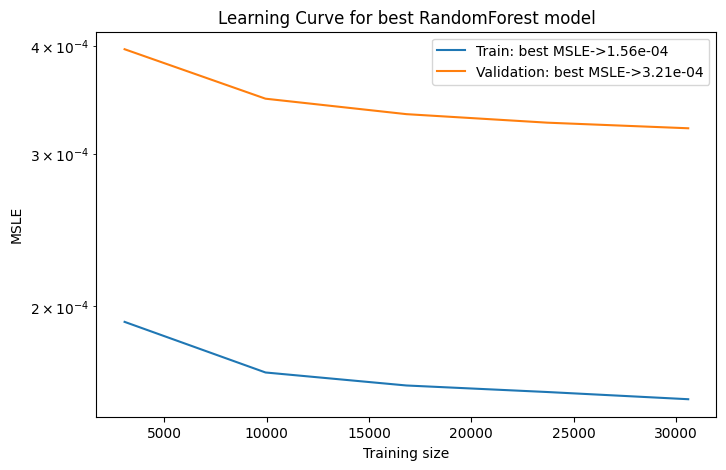




>Saving the grid search info:
The grid search info is saved in the "QS_rf_grid_dpde_32X.pkl" file !!!


In [49]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr16s100.csv",mag_reg="dPdE",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="QS_rf_grid_dpde_32X")

#### ->Using rowwise-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr16s100_rwshuffled.csv","dPdE",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "dPdE"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 11.0'59.53"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.0006636518256044761



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "dPdE"


array([[0.45047391, 0.42442902, 0.39880064, ..., 0.37214611, 0.36886669,
        0.36627416],
       [0.45962231, 0.42561548, 0.39681608, ..., 0.36985596, 0.36668352,
        0.3641926 ],
       [0.41292511, 0.38807001, 0.36989195, ..., 0.35420968, 0.35240756,
        0.35099531],
       ...,
       [0.40403277, 0.38767015, 0.37220027, ..., 0.35643195, 0.3544986 ,
        0.35296972],
       [0.62913138, 0.53875344, 0.46799829, ..., 0.40730909, 0.4005192 ,
        0.39523839],
       [0.39935304, 0.38249349, 0.36775467, ..., 0.35350347, 0.35179375,
        0.3504461 ]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
32262,0.468992,0.437713,0.407627,0.388967,0.382096,0.377207,0.373508,0.370587
15851,0.459864,0.422123,0.392924,0.376918,0.371295,0.367364,0.364421,0.362116
4762,0.375856,0.361615,0.352067,0.347077,0.345339,0.344124,0.343213,0.342499
5369,0.481106,0.429357,0.395145,0.377803,0.371885,0.367791,0.364749,0.362377
27981,0.440641,0.414161,0.390167,0.375760,0.370512,0.366790,0.363979,0.361761
...,...,...,...,...,...,...,...,...
32469,0.508325,0.468362,0.429286,0.404922,0.395957,0.389587,0.384775,0.380981
16317,0.575014,0.506055,0.448937,0.417032,0.405850,0.398062,0.392257,0.387726
12895,0.345426,0.342025,0.339355,0.337841,0.337296,0.336910,0.336618,0.336388
6012,0.664680,0.562661,0.482583,0.439622,0.424874,0.414697,0.407165,0.401316


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[9.13673076e-04 6.35823553e-04 3.58035073e-04 2.08637765e-04
 1.61487300e-04 1.31089473e-04 1.09976913e-04 9.45149501e-05]
Uniform average
0.0003266547629645292
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00201366 0.00134337 0.00072258 0.00040835 0.0003124  0.00025147
 0.00020962 0.00017923]
Uniform average
0.0006800845203187003



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
----------------------------------------------------------

array([[0.42281829, 0.39956351, 0.3793955 , ..., 0.36011865, 0.35782364,
        0.35601757],
       [0.63402403, 0.54039255, 0.46827778, ..., 0.40715865, 0.40035718,
        0.3950718 ],
       [0.49017259, 0.46034614, 0.42753386, ..., 0.39031627, 0.38556956,
        0.38179784],
       ...,
       [0.6766371 , 0.57049702, 0.48750051, ..., 0.41715905, 0.4093637 ,
        0.40331317],
       [0.42284313, 0.40158971, 0.38178399, ..., 0.3619003 , 0.35948405,
        0.35757662],
       [0.43088231, 0.40999911, 0.38900629, ..., 0.3666798 , 0.36389862,
        0.36169484]])

Actual values of "dPdE"


,dP_dE(10),dP_dE(100),dP_dE(300),dP_dE(600),dP_dE(800),dP_dE(1000),dP_dE(1200),dP_dE(1400)
4484,0.346906,0.342535,0.339519,0.337909,0.337342,0.336944,0.336645,0.336409
3943,0.674107,0.566299,0.483741,0.440079,0.425175,0.414914,0.407330,0.401447
46761,0.570864,0.531659,0.483988,0.449243,0.435552,0.425564,0.417890,0.411771
5042,0.420040,0.390020,0.370292,0.360183,0.356702,0.354281,0.352475,0.351062
49298,0.540687,0.507815,0.467170,0.437057,0.425074,0.416289,0.409515,0.404097
...,...,...,...,...,...,...,...,...
32199,0.451122,0.423975,0.397977,0.381853,0.375907,0.371671,0.368464,0.365929
1778,0.657044,0.547810,0.469682,0.429710,0.416208,0.406942,0.400104,0.394806
4038,0.700208,0.588726,0.499618,0.451505,0.434983,0.423590,0.415165,0.408627
17495,0.391979,0.375475,0.362292,0.354840,0.352175,0.350296,0.348880,0.347764


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00182848 0.00126489 0.00070894 0.00041234 0.00031902 0.00025891
 0.0002172  0.00018665]
Uniform average
0.0006495542421266166
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00402566 0.00266309 0.00142537 0.00080447 0.00061537 0.00049538
 0.00041299 0.00035317]
Uniform average
0.001349438710306006



>Learning curve


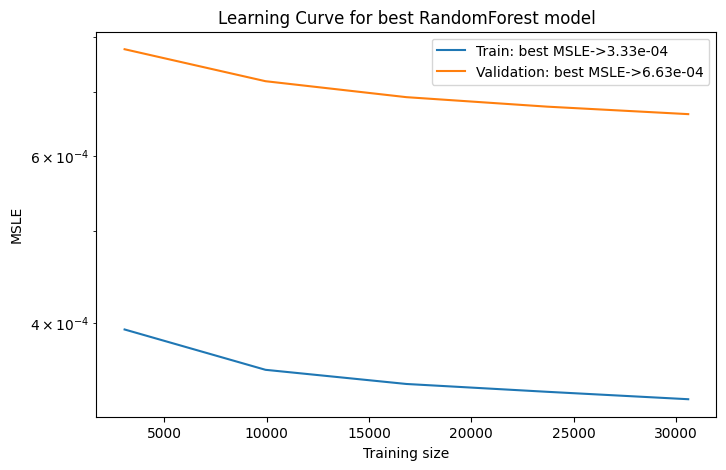




>Saving the grid search info:
The grid search info is saved in the "QS_rf_grid_dpde_32X_rwsh.pkl" file !!!


In [50]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr16s100_rwshuffled.csv",mag_reg="dPdE",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="QS_rf_grid_dpde_32X_rwsh")

### B. Predicting Energy on center $E_c$ Values

#### ->Using non-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr16s100.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 7.0'35.56"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features='sqrt', min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.0017901032763989366



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 427.13420192,  632.30434708, 1116.09343686, ..., 2929.77239871,
        3464.67891902, 4004.01178612],
       [ 278.28498354,  492.93747404, 1001.33626906, ..., 2889.94087406,
        3443.08102416, 3999.62332028],
       [ 277.93318634,  512.30076045, 1054.67888328, ..., 3023.56786404,
        3594.63877542, 4167.8322487 ],
       ...,
       [ 393.41101734,  640.59714488, 1201.91012852, ..., 3210.93198661,
        3790.62092894, 4371.7586111 ],
       [ 176.85689076,  329.04713818,  724.35295998, ..., 2335.41469805,
        2825.71476388, 3323.75135839],
       [ 312.47019571,  561.42152845, 1126.96331208, ..., 3147.85803571,
        3730.34554329, 4314.10751202]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
32262,422.392386,621.810029,1097.845446,1853.594504,2372.663225,2899.641470,3432.582888,3970.228572
15851,287.298480,492.925405,987.178599,1769.081242,2303.965357,2845.644645,3392.352528,3942.976574
4762,263.573512,508.602598,1070.603022,1929.736762,2507.521843,3087.738373,3669.728711,4253.087108
5369,209.068770,409.184602,898.729128,1677.830769,2211.686541,2752.631515,3298.781303,3848.962662
27981,400.169283,611.666433,1111.575380,1897.084443,2433.330495,2975.993141,3523.453928,4074.678336
...,...,...,...,...,...,...,...,...
32469,398.869214,584.142983,1033.057898,1755.370947,2255.196081,2764.618484,3281.315805,3803.774126
16317,247.596679,415.884851,839.758664,1536.735095,2023.305028,2521.145880,3027.445210,3540.395936
12895,370.043469,632.092264,1219.553481,2105.844489,2698.347337,3291.654830,3885.552838,4479.908121
6012,173.091699,322.002527,710.992105,1366.742437,1830.029258,2306.803251,2793.719210,3288.621535


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00198514 0.00041549 0.00078585 0.00113306 0.00117812 0.00116737
 0.00113285 0.00108897]
Uniform average
0.0011108564144503496
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[  369.13846789   181.49089421   860.11676163  3679.55326542
  6331.73608896  9420.62958905 12853.37587079 16565.98134248]
Uniform average
6282.752785053706



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
--------------------------------------------------------------

array([[ 304.63412419,  554.58348902, 1122.11995048, ..., 3148.19595276,
        3731.87965036, 4316.75945908],
       [ 160.08237652,  307.66366294,  694.92446436, ..., 2287.12407977,
        2773.24182748, 3267.40158278],
       [ 497.09574798,  685.87904094, 1135.94642121, ..., 2856.28429084,
        3368.99131384, 3887.44690389],
       ...,
       [ 155.76441214,  298.20702329,  673.72712886, ..., 2232.27465721,
        2710.36208032, 3196.97166035],
       [ 365.41386936,  612.47920169, 1174.2677278 , ..., 3185.63020997,
        3765.94276744, 4347.67750544],
       [ 455.57968818,  672.36410165, 1177.3010232 , ..., 3043.63398974,
        3590.54854529, 4141.07848835]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
4484,292.260609,553.659409,1140.632177,2026.650945,2619.056276,3212.294784,3806.140683,4400.454813
3943,160.621511,308.144588,695.643556,1350.374926,1813.265219,2289.749411,2776.441667,3271.164559
46761,544.141070,707.926847,1104.305871,1750.368703,2202.890529,2667.681235,3142.108931,3624.366575
5042,234.342556,458.285849,987.277628,1810.465357,2368.622630,2931.328901,3497.360625,4065.960688
49298,612.123005,784.261036,1196.790937,1863.154006,2327.516212,2803.185046,3287.730823,3779.486496
...,...,...,...,...,...,...,...,...
32199,435.513310,642.039217,1131.276683,1902.948726,2431.090894,2966.310657,3506.854944,4051.593372
1778,151.010613,303.207014,703.169984,1375.418536,1848.846392,2335.108675,2830.947868,3334.288088
4038,157.980021,299.828250,673.830015,1310.107719,1761.959862,2228.216557,2705.348470,3191.068175
17495,349.353181,584.723573,1128.702373,1966.654258,2532.553670,3102.052309,3674.205570,4248.421470


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00285793 0.0004924  0.00123379 0.00184181 0.00192176 0.00190659
 0.00185113 0.00177978]
Uniform average
0.0017356478330199305
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[  522.63400594   210.92696649  1342.49175106  6016.32583658
 10401.32985977 15501.31494343 21163.23352539 27281.89471268]
Uniform average
10305.018950169018



>Learning curve


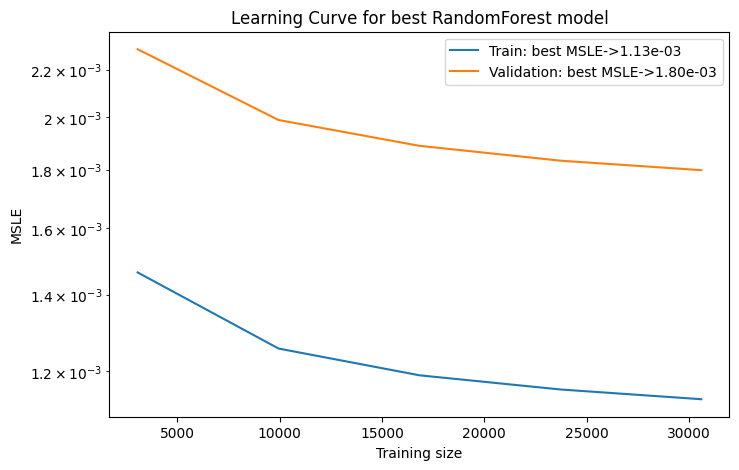




>Saving the grid search info:
The grid search info is saved in the "QS_rf_grid_enrg_32X.pkl" file !!!


In [51]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr16s100.csv",mag_reg="enrg",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="QS_rf_grid_enrg_32X")

#### ->Using rowwise-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr16s100_rwshuffled.csv","enrg",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "enrg"
Number of Y columns:  8
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-------------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 11.0'24.83"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.003927072359368175



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "enrg"


array([[ 421.29849204,  627.17774125, 1112.70734188, ..., 2931.66625756,
        3467.86254119, 4008.41411825],
       [ 292.67881256,  500.93212695,  996.16854873, ..., 2849.30254869,
        3394.13548882, 3942.89311151],
       [ 289.75862727,  509.20782797, 1024.60772904, ..., 2927.15356117,
        3483.17823238, 4042.35739866],
       ...,
       [ 415.70224842,  657.87552703, 1209.84237468, ..., 3195.22957597,
        3769.49762204, 4345.5747254 ],
       [ 183.88282059,  341.85184823,  748.65097219, ..., 2389.54164086,
        2886.71714725, 3391.17556461],
       [ 342.22462843,  574.16392101, 1109.29983463, ..., 3055.8942578 ,
        3621.56241592, 4189.66355105]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
32262,422.392386,621.810029,1097.845446,1853.594504,2372.663225,2899.641470,3432.582888,3970.228572
15851,287.298480,492.925405,987.178599,1769.081242,2303.965357,2845.644645,3392.352528,3942.976574
4762,263.573512,508.602598,1070.603022,1929.736762,2507.521843,3087.738373,3669.728711,4253.087108
5369,209.068770,409.184602,898.729128,1677.830769,2211.686541,2752.631515,3298.781303,3848.962662
27981,400.169283,611.666433,1111.575380,1897.084443,2433.330495,2975.993141,3523.453928,4074.678336
...,...,...,...,...,...,...,...,...
32469,398.869214,584.142983,1033.057898,1755.370947,2255.196081,2764.618484,3281.315805,3803.774126
16317,247.596679,415.884851,839.758664,1536.735095,2023.305028,2521.145880,3027.445210,3540.395936
12895,370.043469,632.092264,1219.553481,2105.844489,2698.347337,3291.654830,3885.552838,4479.908121
6012,173.091699,322.002527,710.992105,1366.742437,1830.029258,2306.803251,2793.719210,3288.621535


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00480491 0.00108823 0.00151097 0.00201527 0.00205771 0.00201643
 0.001942   0.00185643]
Uniform average
0.0021614930711904667
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[  721.31077523   398.63311904  1539.87392222  6278.18907133
 10719.53043295 15880.15960714 21604.67938725 27786.66467804]
Uniform average
10616.130124150735



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------

array([[ 317.16019699,  549.64660599, 1087.07033251, ..., 3041.55233547,
        3609.19317593, 4179.16432291],
       [ 174.04903494,  328.48634356,  728.5968147 , ..., 2352.53343703,
        2845.82613813, 3346.6617721 ],
       [ 481.99771324,  671.81080338, 1124.02489424, ..., 2850.13861792,
        3364.19225416, 3883.9080178 ],
       ...,
       [ 169.72916792,  319.785315  ,  710.95196552, ..., 2311.28720526,
        2799.10976424, 3294.83092499],
       [ 392.11576264,  622.70751863, 1154.2055229 , ..., 3089.68316825,
        3652.64819454, 4218.19877834],
       [ 486.37316176,  705.34369433, 1213.16286859, ..., 3084.0548914 ,
        3631.75785449, 4182.97457363]])

Actual values of "enrg"


,E_c(10),E_c(100),E_c(300),E_c(600),E_c(800),E_c(1000),E_c(1200),E_c(1400)
4484,292.260609,553.659409,1140.632177,2026.650945,2619.056276,3212.294784,3806.140683,4400.454813
3943,160.621511,308.144588,695.643556,1350.374926,1813.265219,2289.749411,2776.441667,3271.164559
46761,544.141070,707.926847,1104.305871,1750.368703,2202.890529,2667.681235,3142.108931,3624.366575
5042,234.342556,458.285849,987.277628,1810.465357,2368.622630,2931.328901,3497.360625,4065.960688
49298,612.123005,784.261036,1196.790937,1863.154006,2327.516212,2803.185046,3287.730823,3779.486496
...,...,...,...,...,...,...,...,...
32199,435.513310,642.039217,1131.276683,1902.948726,2431.090894,2966.310657,3506.854944,4051.593372
1778,151.010613,303.207014,703.169984,1375.418536,1848.846392,2335.108675,2830.947868,3334.288088
4038,157.980021,299.828250,673.830015,1310.107719,1761.959862,2228.216557,2705.348470,3191.068175
17495,349.353181,584.723573,1128.702373,1966.654258,2532.553670,3102.052309,3674.205570,4248.421470


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00649787 0.00146938 0.0029748  0.0040053  0.00406925 0.00397075
 0.00381143 0.00363386]
Uniform average
0.003804077856560605
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[ 1002.93920496   490.66401671  2984.50519675 12538.03926894
 21345.20816209 31512.37130013 42742.68657392 54833.72477722]
Uniform average
20931.267312589203



>Learning curve


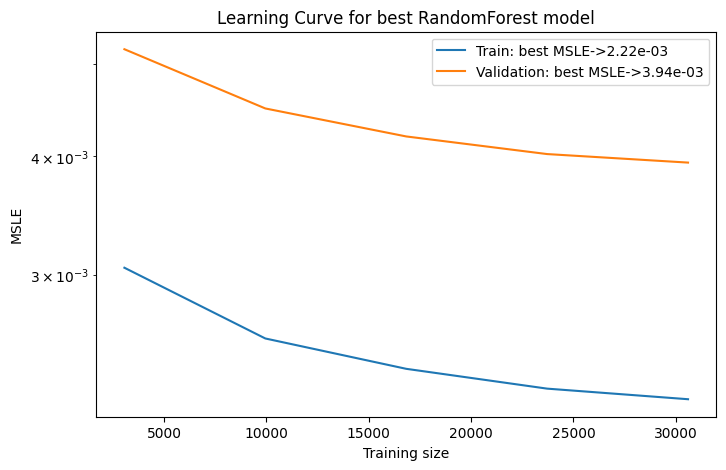




>Saving the grid search info:
The grid search info is saved in the "QS_rf_grid_enrg_32X_rwsh.pkl" file !!!


In [52]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr16s100_rwshuffled.csv",mag_reg="enrg",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="QS_rf_grid_enrg_32X_rwsh")

### C. Predicting center pressure on maximum mass $P_c(M_{max})$ Values

#### ->Using non-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr16s100.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 6.0'49.53"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.004639390999594274



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([520.81877821, 334.8134713 , 317.8799785 , ..., 457.84859487,
       224.51058422, 357.64462871])

Actual values of "PcMmax"


,Pc(M_max)
32262,522.0
15851,350.0
4762,297.0
5369,249.0
27981,501.0
...,...
32469,500.0
16317,314.0
12895,439.0
6012,227.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00221632]
Uniform average
0.0022163247797079527
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[594.89780937]
Uniform average
594.8978093738785



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([332.4647053 , 214.19237921, 658.27734489, ..., 214.55199124,
       415.85447472, 598.65722442])

Actual values of "PcMmax"


,Pc(M_max)
4484,338.0
3943,213.0
46761,712.0
5042,274.0
49298,801.0
...,...
32199,539.0
1778,197.0
4038,210.0
17495,419.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00456052]
Uniform average
0.004560522776524753
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[1223.58726483]
Uniform average
1223.5872648280274



>Learning curve


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConvers

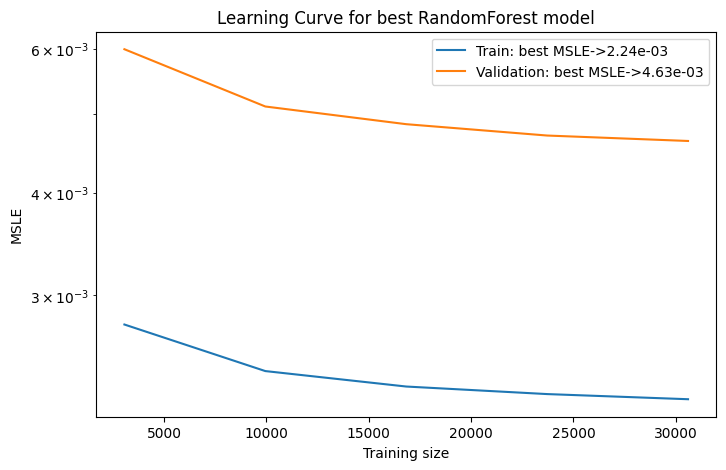




>Saving the grid search info:
The grid search info is saved in the "QS_rf_grid_PcMmax_32X.pkl" file !!!


In [53]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr16s100.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="QS_rf_grid_PcMmax_32X")

#### ->Using rowwise-shuffled data

In [ ]:
# Showing the datasets
# regression_ML("QS_reg_data_pp8mr16s100_rwshuffled.csv","PcMmax",0.25).show_datasets()

TRAINING AND ASSESSING A MACHINE LEARNING REGRESSION MODEL


>Preliminaries
>> DATA INFO AND SCALING:
-------------------------------------------------------------------------------------------------------------------
Y (response) data type: "PcMmax"
Number of Y columns:  1
X (explanatory) data type: "Mass" and "Radius"
Number of X columns:  32
The scaling of the X (explanatory) data has been completed
-------------------------------------------------------------------------------------------------------------------
>> CROSS-VALIDATION SETTINGS:
-------------------------------------------------------------------------------------------------------------------
The KFold cross-validator has been initialized with 5 n_splits
The cross-validation scorer has been initialized with the "Mean_Squared_Log_Error" as metric
-------------------------------------------------------------------------------------------------------------------
>> ESTIMATOR INFO:
-----------------------------------------

{'n_estimators': [25, 50],
 'max_depth': [None, 10, 20],
 'min_samples_split': [20, 40],
 'min_samples_leaf': [10, 12, 14],
 'max_features': [None, 'sqrt', 'log2']}

-------------------------------------------------------------------------------------------------------------------
>> FITTING PROCEDURE OVERVIEW:
-------------------------------------------------------------------------------------------------------------------
The grid search has been initialized


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

Ongoing fitting process...
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=KFold(n_splits=5, random_state=50, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=18,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [10, 12, 14],
                         'min_samples_split': [20, 40],
                         'n_estimators': [25, 50]},
             scoring=make_scorer(mean_squared_log_error, greater_is_better=False, response_method='predict'),
             verbose=1)

The fitting process has been completed
Elapsed fitting time: 7.0'26.44"
Available CPU cores: 18
-------------------------------------------------------------------------------------------------------------------
>> RESULTS:
-------------------------------------------------------------------------------------------------------------------
Best model:   RandomForestRegressor(max_features=None, min_samples_leaf=10,
                      min_samples_split=20, n_estimators=50, random_state=45)
Best parameters:   {'max_depth': None, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 50}
Best cross-validation score (msle):   0.009383846944271537



>Overfitting metrics (using the train dataset as test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([522.23784773, 358.69941431, 338.63592297, ..., 487.40568334,
       229.5039293 , 380.12188563])

Actual values of "PcMmax"


,Pc(M_max)
32262,522.0
15851,350.0
4762,297.0
5369,249.0
27981,501.0
...,...
32469,500.0
16317,314.0
12895,439.0
6012,227.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00465252]
Uniform average
0.004652523955052104
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[1064.8358107]
Uniform average
1064.8358106960086



>Prediction metrics (using the actual test dataset)
>> PREDICTIONS AND REAL VALUES:
-------------------------------------------------------------------------------------------------------------------
Predictions of "PcMmax"


array([381.33845899, 212.03671633, 658.15915433, ..., 215.7773878 ,
       447.03555089, 590.99472216])

Actual values of "PcMmax"


,Pc(M_max)
4484,338.0
3943,213.0
46761,712.0
5042,274.0
49298,801.0
...,...
32199,539.0
1778,197.0
4038,210.0
17495,419.0


-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED LOG ERROR (MSLE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[0.00920694]
Uniform average
0.009206940940670202
-------------------------------------------------------------------------------------------------------------------
>> MEAN SQUARED ERROR (MSE) RESULTS:
-------------------------------------------------------------------------------------------------------------------
Raw values
[2115.57629678]
Uniform average
2115.5762967836486



>Learning curve


c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\johns\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConvers

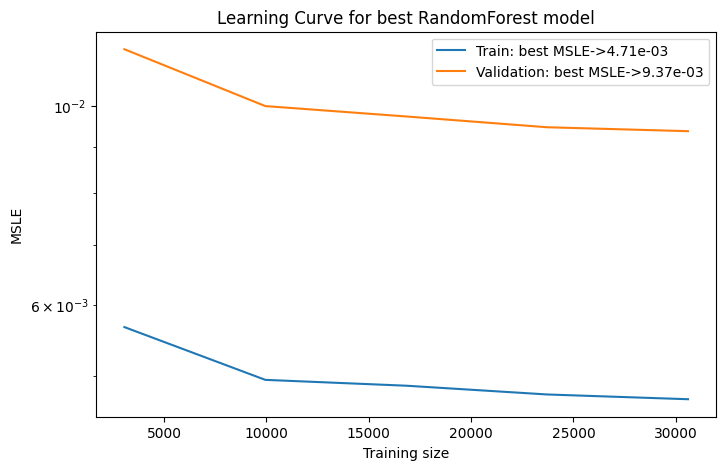




>Saving the grid search info:
The grid search info is saved in the "QS_rf_grid_PcMmax_32X_rwsh.pkl" file !!!


In [54]:
# Building a regression model
regression_ML("QS_reg_data_pp8mr16s100_rwshuffled.csv",mag_reg="PcMmax",test_ratio=0.25).train_test("rf",5,rf_grid,"msle",cores_par=18,filesave="QS_rf_grid_PcMmax_32X_rwsh")